# FRAUDE TARJETAS DE CRÉDITO.

Motivación: 
- El numero de transacciones fraudulentas sobre el total es de un 0.6 %
- El monto de transacciones fraudulentas sobre el total de transacciones es de un 4.4 %

Según un estudio reciente de la Confederación Española de Organizaciones Empresariales (CEOE), las empresas en España obtienen en promedio un beneficio neto del 5,7% sobre sus ventas. Este porcentaje varía según el sector, siendo el sector servicios el que tiene un mayor margen de beneficio con un 7,3%

Objetivo: Usando varios tipos de modelos de machine learning, indentificar las mejores variables para predecir el fraude en tarjetas de crédito.
    
- Métrica de evaluación: Recall (TP/ (TP+FN))

Notas técnicas:
- IMPORTANTE: Técnicas de rebalanceo y oversampling para que aprenda de los 1s, que al final es lo que me interesa. El resamplng solo se hace en train, hay que dejar la parte de test sin tocar(!)
- Va a ser necesario mucho feature engineering- media y mediana de transacción por cliente y comercio, número de transacciones por mes por cliente, por semana, variación del número de transacciones, etc.

Variables:
*    trans_date_trans_time -> Transaction time stamp

*    cc_num -> Credit card number

*    merchant -> merchant name

*    category -> transaction category

*    amt -> Transaction amount

*    first -> First name of card holder

*    last -> Last name of card holder

*    gender -> Sex of card holder

*    street -> transaction address

*    city -> transaction city

*    state -> transaction state

*    zip -> transaction zipcode

*    lat -> transaction lattitude

*    long -> transaction longitude

*    city_pop -> Population of the city

*    job -> job of the card holder

*    dob -> date of birth of card holder

*    trans_num -> transaction number of transaction

*    unix_time -> time in unix format

*    merch_lat -> lattitude of the merchant

*    merch_long -> longitude of merchant

*    is_fraud -> nature of transaction (fraud or not fraud)

In [874]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [875]:
data= pd.read_csv(r"C:\Users\rafam\OneDrive\Documentos\GitHub\Proyecto Machine Learning\fraudTrain.csv")
df= pd.DataFrame(data)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [1634]:
df_delinq_usstates= pd.read_csv(r"C:\Users\rafam\OneDrive\Documentos\GitHub\ENTREGA_FRAUDE\deliq_by_state.csv")
df_delinq_usstates

,state,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score
0,NV,0.1200,3350,0.209,701
1,FL,0.1066,3450,0.196,706
2,AR,0.1023,2380,0.153,694
3,TX,0.0943,3190,0.175,692
4,AZ,0.0940,3060,0.185,710
5,OK,0.0916,2530,0.164,692
6,CA,0.0907,3330,0.215,721
7,NM,0.0907,2540,0.177,699
8,NY,0.0894,3520,0.213,722
9,GA,0.0891,3210,0.163,693


In [1635]:
merged_df1= pd.merge(df, df_delinq_usstates, on= 'state', how= 'inner')
merged_df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,mean_transactions_per_day,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day,is_frequent_fraudster,amt_over_300,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score
0,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,2.169231,0,104.715308,1,1,0,0.0672,2730,0.183,731
1,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,6.688590,0,88.146133,0,1,0,0.1066,3450,0.196,706
2,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,5.347994,0,66.700754,0,0,0,0.0665,2450,0.162,729
3,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,2.054688,0,71.139902,1,1,0,0.0708,2430,0.158,712
4,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,5.397485,0,95.369381,1,1,0,0.0660,3560,0.201,721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293057,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,7.917532,0,88.967494,0,1,0,0.0738,3700,0.212,725
1293058,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,5.588235,0,90.289835,1,1,0,0.0682,2700,0.183,721
1293059,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,4.608472,0,64.813383,0,1,0,0.0534,2510,0.177,735
1293060,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,7.737360,0,89.186195,0,1,0,0.0877,2150,0.123,681


In [877]:
df.shape

(1296675, 23)

In [878]:
df= df.rename(columns = {'Unnamed: 0':'id'})

In [879]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [880]:
df.describe()

,id,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [882]:
df['is_fraud'].value_counts(normalize= True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

In [883]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [884]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

## ANÁLISIS EXPLORATIORIO

### ANÁLISIS UNIVARIANTE

### ANÁLISIS BIVARIANTE

In [885]:
df.groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud job                                                 
1        Architect                        948.818182  972.280
         Designer, jewellery              899.408571  857.620
         Gaffer                           897.211111  862.730
         Ship broker                      874.505714  949.440
         Community education officer      869.980000  925.270
...                                              ...      ...
0        Engineer, materials               49.650470   35.120
         Travel agency manager             49.288215   24.280
         Seismic interpreter               48.242206   27.410
         Therapist, sports                 47.170546   23.255
         Producer, television/film/video   46.192804   34.570

[918 rows x 2 columns]

In [886]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud job                                                      
1        Architect                             948.818182  972.280
         Designer, jewellery                   899.408571  857.620
         Gaffer                                897.211111  862.730
         Ship broker                           874.505714  949.440
         Community education officer           869.980000  925.270
...                                                   ...      ...
         Pathologist                           168.640000   67.275
         Information officer                   168.566250  186.720
         Geophysicist/field seismologist       160.656000   21.480
         English as a second language teacher  140.075000  140.075
         Theatre manager                       125.860000   18.870

[443 rows x 2 columns]

In [887]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud job                                                
0        Manufacturing systems engineer   100.943205  54.085
         Chief of Staff                    97.517109  76.325
         Air broker                        96.932320  76.540
         Secretary/administrator           96.874603  75.970
         Horticultural therapist           96.586783  76.770
...                                              ...     ...
         Engineer, materials               49.650470  35.120
         Travel agency manager             49.288215  24.280
         Seismic interpreter               48.242206  27.410
         Therapist, sports                 47.170546  23.255
         Producer, television/film/video   46.192804  34.570

[475 rows x 2 columns]

In [888]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'category'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud category                           
1        shopping_net    999.254939  995.570
         shopping_pos    876.921815  867.760
         misc_net        797.012852  792.330
         entertainment   503.535579  498.860
         grocery_pos     311.989616  309.980
         home            257.432626  252.160
         misc_pos        218.284080    8.955
         food_dining     120.076954  119.420
         personal_care    26.170545   20.825
         health_fitness   20.248421   19.800
         kids_pets        18.121674   19.520
         gas_transport    12.288204   10.645
         grocery_net      12.162836   12.365
         travel            9.064569    9.735

In [889]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'job'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=True)

mean  median
is_fraud job                                                
0        Producer, television/film/video   46.192804  34.570
         Therapist, sports                 47.170546  23.255
         Seismic interpreter               48.242206  27.410
         Travel agency manager             49.288215  24.280
         Engineer, materials               49.650470  35.120
...                                              ...     ...
         Horticultural therapist           96.586783  76.770
         Secretary/administrator           96.874603  75.970
         Air broker                        96.932320  76.540
         Chief of Staff                    97.517109  76.325
         Manufacturing systems engineer   100.943205  54.085

[475 rows x 2 columns]

In [890]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'merchant'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean   median
is_fraud merchant                                                   
1        fraud_Fisher Inc                       1039.242286  1053.08
         fraud_Altenwerth, Cartwright and Koss  1030.005000  1031.98
         fraud_Medhurst PLC                     1026.265152  1045.55
         fraud_Kuhic, Bins and Pfeffer          1022.197179  1018.71
         fraud_Gottlieb, Considine and Schultz  1022.034571  1019.96
...                                                     ...      ...
         fraud_Mosciski Group                      4.806667     4.50
         fraud_Breitenberg LLC                     4.440000     3.10
         fraud_Hagenes, Hermann and Stroman        3.633333     2.45
         fraud_Hartmann, Rowe and Hermann          2.780000     2.78
         fraud_Jerde-Hermann                       2.770000     2.77

[679 rows x 2 columns]

In [891]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'merchant'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud merchant                                                
0        fraud_Boyer-Haley                     166.450217   6.210
         fraud_Little-Gleichner                163.239655   6.090
         fraud_Monahan, Hermann and Johns      159.500222   6.240
         fraud_Champlin, Rolfson and Connelly  156.982239   6.330
         fraud_Eichmann, Hayes and Treutel     147.996357   6.430
...                                                   ...     ...
         fraud_Auer LLC                         46.522964  30.730
         fraud_Leffler-Goldner                  46.479767  32.295
         fraud_Morissette-Schaefer              46.308897  29.635
         fraud_Bradtke, Torp and Bahringer      46.031741  31.250
         fraud_Parker-Kunde                     45.936454  31.005

[693 rows x 2 columns]

In [892]:
df[df['is_fraud'] == 1].groupby(['is_fraud', 'city'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean    median
is_fraud city                                   
1        De Lancey          926.156667  1067.280
         North East         918.425556  1031.240
         Schaefferstown     897.211111   862.730
         Thida              888.572500  1019.155
         Harrodsburg        884.250000   880.000
...                                ...       ...
         Bauxite            110.463750    69.585
         Westhampton Beach   79.926250    64.690
         Hurricane           18.403333    17.950
         Phenix City         12.700000    12.700
         Denham Springs      10.220000    10.220

[702 rows x 2 columns]

In [893]:
trans_per_city= df['city'].value_counts()

In [894]:
fraudulent_trans_per_city= df[df['is_fraud'] == 1].groupby('city').size()

In [895]:
fraud_trans_per_city= fraudulent_trans_per_city/trans_per_city
fraud_trans_per_city.fillna(0, inplace=True)
fraud_trans_per_city

city
Achille                      0.024436
Acworth                      0.006199
Adams                        0.000000
Afton                        0.004423
Akron                        0.000000
                               ...   
Woods Cross                  0.000000
Woodville                    0.000000
Yellowstone National Park    0.022857
Zaleski                      0.007707
Zavalla                      0.000000
Length: 894, dtype: float64

In [896]:
df['fraud_trans_per_city'] = df['city'].map(fraud_trans_per_city)

# Crear una columna dummy basada en la condición per_fraud_trans_per_city > 0.1
df['is_fraud_city'] = df['fraud_trans_per_city'] > 0.5

df['is_fraud_city']= df['is_fraud_city'].astype(int)

In [897]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'fraud_trans_per_city', 'is_fraud_city'],
      dtype='object')

In [898]:
trans_per_zip= df['zip'].value_counts()

In [899]:
fraudulent_trans_per_zip= df[df['is_fraud'] == 1].groupby('zip').size()

In [900]:
fraud_trans_per_zip= fraudulent_trans_per_zip/trans_per_zip
fraud_trans_per_zip.fillna(0, inplace=True)
fraud_trans_per_zip

zip
1257     0.000000
1330     0.008729
1535     0.017476
1545     0.000000
1612     0.017341
           ...   
99160    0.000000
99323    0.002722
99746    0.016667
99747    1.000000
99783    0.009566
Length: 970, dtype: float64

In [901]:
df['fraud_trans_per_zip'] = df['zip'].map(fraud_trans_per_zip)

df['is_fraud_zip'] = df['fraud_trans_per_zip'] > 0.5

df['is_fraud_zip']= df['is_fraud_zip'].astype(int)

In [902]:
condition = df['fraud_trans_per_zip'] > 0.5

# Contar la cantidad de registros que cumplen la condición
count = condition.sum()

print(f"Cantidad de registros donde 'fraud_trans_per_zip' > 0.5: {count}")

Cantidad de registros donde 'fraud_trans_per_zip' > 0.5: 721


In [903]:
trans_per_merchant= df['merchant'].value_counts()

In [904]:
fraudulent_trans_per_merchant= df[df['is_fraud'] == 1].groupby('merchant').size()

In [905]:
fraud_trans_per_merchant= fraudulent_trans_per_merchant/trans_per_merchant
fraud_trans_per_merchant.fillna(0, inplace=True)
fraud_trans_per_merchant

merchant
fraud_Abbott-Rogahn                 0.001627
fraud_Abbott-Steuber                0.003403
fraud_Abernathy and Sons            0.002284
fraud_Abshire PLC                   0.004749
fraud_Adams, Kovacek and Kuhlman    0.004255
                                      ...   
fraud_Zemlak Group                  0.013107
fraud_Zemlak, Tillman and Cremin    0.001109
fraud_Ziemann-Waters                0.003540
fraud_Zieme, Bode and Dooley        0.003125
fraud_Zulauf LLC                    0.001122
Length: 693, dtype: float64

In [906]:
df['fraud_trans_per_merchant'] = df['merchant'].map(fraud_trans_per_merchant)

df['is_fraud_merchant'] = df['fraud_trans_per_merchant'] > 0.5

df['is_fraud_merchant']= df['is_fraud_merchant'].astype(int)

In [907]:
condition = df['fraud_trans_per_merchant'] > 0.03

# Contar la cantidad de registros que cumplen la condición
count = condition.sum()

print(f"Cantidad de registros donde 'fraud_trans_per_merchant' > 0.03: {count}")

Cantidad de registros donde 'fraud_trans_per_merchant' > 0.03: 0


In [908]:
trans_per_category= df['category'].value_counts()

In [909]:
fraudulent_trans_per_category= df[df['is_fraud'] == 1].groupby('category').size()

In [910]:
fraud_trans_per_category= fraudulent_trans_per_category/trans_per_category
fraud_trans_per_category.fillna(0, inplace=True)
fraud_trans_per_category

category
entertainment     0.002478
food_dining       0.001651
gas_transport     0.004694
grocery_net       0.002948
grocery_pos       0.014098
health_fitness    0.001549
home              0.001608
kids_pets         0.002114
misc_net          0.014458
misc_pos          0.003139
personal_care     0.002424
shopping_net      0.017561
shopping_pos      0.007225
travel            0.002864
dtype: float64

In [911]:
df['fraud_trans_per_category'] = df['category'].map(fraud_trans_per_category)

# Crear una columna dummy basada en la condición per_fraud_trans_per_city > 0.1
df['is_fraud_category'] = df['fraud_trans_per_category'] > 0.1

df['is_fraud_category']= df['is_fraud_category'].astype(int)

In [912]:
condition = df['fraud_trans_per_category'] > 0.1

# Contar la cantidad de registros que cumplen la condición
count = condition.sum()

print(f"Cantidad de registros donde 'fraud_trans_per_category' > 0.1: {count}")

Cantidad de registros donde 'fraud_trans_per_category' > 0.1: 0


In [913]:
df.columns

Index(['id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'fraud_trans_per_city', 'is_fraud_city',
       'fraud_trans_per_zip', 'is_fraud_zip', 'fraud_trans_per_merchant',
       'is_fraud_merchant', 'fraud_trans_per_category', 'is_fraud_category'],
      dtype='object')

In [914]:
df.groupby('city').count()

,id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,fraud_trans_per_city,is_fraud_city,fraud_trans_per_zip,is_fraud_zip,fraud_trans_per_merchant,is_fraud_merchant,fraud_trans_per_category,is_fraud_category
city,,,,,,,,,,,,,,,,,,,,,
Achille,532,532,532,532,532,532,532,532,532,532,...,532,532,532,532,532,532,532,532,532,532
Acworth,2097,2097,2097,2097,2097,2097,2097,2097,2097,2097,...,2097,2097,2097,2097,2097,2097,2097,2097,2097,2097
Adams,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
Afton,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035,...,2035,2035,2035,2035,2035,2035,2035,2035,2035,2035
Akron,511,511,511,511,511,511,511,511,511,511,...,511,511,511,511,511,511,511,511,511,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woods Cross,514,514,514,514,514,514,514,514,514,514,...,514,514,514,514,514,514,514,514,514,514
Woodville,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,...,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109
Yellowstone National Park,525,525,525,525,525,525,525,525,525,525,...,525,525,525,525,525,525,525,525,525,525


In [915]:
perc_fraudulent_trans_per_city= fraudulent_trans_per_city/ trans_per_city

In [916]:
perc_fraudulent_trans_per_city[(perc_fraudulent_trans_per_city > 0.5)].value_counts()

1.0    58
Name: count, dtype: int64

In [917]:
perc_fraudulent_trans_per_city[(perc_fraudulent_trans_per_city > 0.5) & (trans_per_city > 10)].index.tolist()


['Beacon',
 'Byesville',
 'Clinton',
 'Coulee Dam',
 'Granbury',
 'Hubbell',
 'Kaktovik',
 'La Grande',
 'Madisonville',
 'Melville',
 'Mineral',
 'Mount Vernon',
 'Phelps',
 'Queen Anne',
 'Roland',
 'Walkertown',
 'Wartburg',
 'West Frankfort',
 'Winnsboro']

In [918]:
df[df['is_fraud'] == 0].groupby(['is_fraud', 'city'])['amt'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

mean  median
is_fraud city                            
0        Amorita       108.151100  34.680
         Cross         101.193699  34.750
         Grimesland    100.943205  54.085
         Beaverdam      99.968718  77.925
         Rock Glen      99.554705  76.070
...                           ...     ...
         Ragland        45.838163  25.100
         Johns Island   45.428324  23.560
         Reno           45.154957  20.425
         Owensville     44.717345  17.030
         Ruidoso        42.951671  22.045

[836 rows x 2 columns]

In [919]:
#investigar date y time

## FEATURE ENGINEERING

In [920]:
df["complete_name"] = df["first"] + '_' + df["last"]

In [921]:
df['complete_name'].nunique()

973

In [922]:
dropped_cols= ['id', 'first', 'last']

In [923]:
df= df.drop(dropped_cols, axis= 1)

In [924]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'fraud_trans_per_city', 'is_fraud_city',
       'fraud_trans_per_zip', 'is_fraud_zip', 'fraud_trans_per_merchant',
       'is_fraud_merchant', 'fraud_trans_per_category', 'is_fraud_category',
       'complete_name'],
      dtype='object')

In [925]:
df['trans_date_trans_time']= pd.to_datetime(df['trans_date_trans_time'])

In [926]:
df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_time'] = df['trans_date_trans_time'].dt.time

In [927]:
df= df.sort_values(by=['complete_name', 'trans_date_trans_time'], ascending= True)

In [928]:
df['time_diff'] = df.groupby('complete_name')['trans_date_trans_time'].diff()

In [929]:
df.head(2052)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,fraud_trans_per_zip,is_fraud_zip,fraud_trans_per_merchant,is_fraud_merchant,fraud_trans_per_category,is_fraud_category,complete_name,transaction_date,transaction_time,time_diff
84,2019-01-01 01:02:16,376028110684021,fraud_Wolf Inc,grocery_pos,89.11,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.013367,0,0.014098,0,Aaron_Murray,2019-01-01,01:02:16,NaT
589,2019-01-01 07:39:00,376028110684021,fraud_Harris Inc,gas_transport,68.85,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.004684,0,0.004694,0,Aaron_Murray,2019-01-01,07:39:00,0 days 06:36:44
954,2019-01-01 12:04:54,376028110684021,fraud_Schimmel-Olson,kids_pets,47.96,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.002730,0,0.002114,0,Aaron_Murray,2019-01-01,12:04:54,0 days 04:25:54
1070,2019-01-01 13:14:46,376028110684021,fraud_Kub-Heaney,health_fitness,77.51,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.000577,0,0.001549,0,Aaron_Murray,2019-01-01,13:14:46,0 days 01:09:52
1715,2019-01-01 18:14:30,376028110684021,fraud_Kessler Inc,travel,461.28,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.003727,0,0.002864,0,Aaron_Murray,2019-01-01,18:14:30,0 days 04:59:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295934,2020-06-21 05:44:40,376028110684021,"fraud_Bernier, Volkman and Hoeger",misc_net,89.41,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.010586,0,0.014458,0,Aaron_Murray,2020-06-21,05:44:40,0 days 21:56:45
1295987,2020-06-21 06:09:11,376028110684021,fraud_Mohr-Bayer,shopping_net,95.02,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.016566,0,0.017561,0,Aaron_Murray,2020-06-21,06:09:11,0 days 00:24:31
1296366,2020-06-21 09:26:55,376028110684021,fraud_Kiehn-Emmerich,grocery_pos,90.02,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0.003902,0,0.016420,0,0.014098,0,Aaron_Murray,2020-06-21,09:26:55,0 days 03:17:44
136,2019-01-01 01:38:31,4958589671582726883,fraud_Powlowski-Weimann,food_dining,187.27,M,793 Hooper Tunnel Suite 154,Burke,VA,22015,...,0.000000,0,0.002779,0,0.001651,0,Aaron_Pena,2019-01-01,01:38:31,NaT


In [930]:
df['time_diff_mins'] = df['time_diff'].dt.total_seconds() / 60

df['time_diff_mins']

84                 NaN
589         396.733333
954         265.900000
1070         69.866667
1715        299.733333
              ...     
1285125     321.700000
1286775     588.683333
1291437    3475.833333
1291447       6.383333
1293360    1072.350000
Name: time_diff_mins, Length: 1296675, dtype: float64

In [931]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_fraud_zip,fraud_trans_per_merchant,is_fraud_merchant,fraud_trans_per_category,is_fraud_category,complete_name,transaction_date,transaction_time,time_diff,time_diff_mins
84,2019-01-01 01:02:16,376028110684021,fraud_Wolf Inc,grocery_pos,89.11,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0,0.013367,0,0.014098,0,Aaron_Murray,2019-01-01,01:02:16,NaT,NaN
589,2019-01-01 07:39:00,376028110684021,fraud_Harris Inc,gas_transport,68.85,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0,0.004684,0,0.004694,0,Aaron_Murray,2019-01-01,07:39:00,0 days 06:36:44,396.733333
954,2019-01-01 12:04:54,376028110684021,fraud_Schimmel-Olson,kids_pets,47.96,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0,0.002730,0,0.002114,0,Aaron_Murray,2019-01-01,12:04:54,0 days 04:25:54,265.900000
1070,2019-01-01 13:14:46,376028110684021,fraud_Kub-Heaney,health_fitness,77.51,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0,0.000577,0,0.001549,0,Aaron_Murray,2019-01-01,13:14:46,0 days 01:09:52,69.866667
1715,2019-01-01 18:14:30,376028110684021,fraud_Kessler Inc,travel,461.28,M,624 Hale Springs Apt. 572,Meadville,MO,64659,...,0,0.003727,0,0.002864,0,Aaron_Murray,2019-01-01,18:14:30,0 days 04:59:44,299.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285125,2020-06-16 15:31:05,374821819075109,fraud_Terry Ltd,home,8.12,M,3703 Benson Wells,Palmyra,NY,14522,...,0,0.001945,0,0.001608,0,Zachary_Boone,2020-06-16,15:31:05,0 days 05:21:42,321.700000
1286775,2020-06-17 01:19:46,374821819075109,fraud_Wisozk and Sons,misc_pos,7.64,M,3703 Benson Wells,Palmyra,NY,14522,...,0,0.003785,0,0.003139,0,Zachary_Boone,2020-06-17,01:19:46,0 days 09:48:41,588.683333
1291437,2020-06-19 11:15:36,374821819075109,fraud_Rau and Sons,grocery_pos,72.94,M,3703 Benson Wells,Palmyra,NY,14522,...,0,0.019679,0,0.014098,0,Zachary_Boone,2020-06-19,11:15:36,2 days 09:55:50,3475.833333
1291447,2020-06-19 11:21:59,374821819075109,fraud_Stoltenberg-Beatty,shopping_pos,4.52,M,3703 Benson Wells,Palmyra,NY,14522,...,0,0.010682,0,0.007225,0,Zachary_Boone,2020-06-19,11:21:59,0 days 00:06:23,6.383333


C:\Users\rafam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


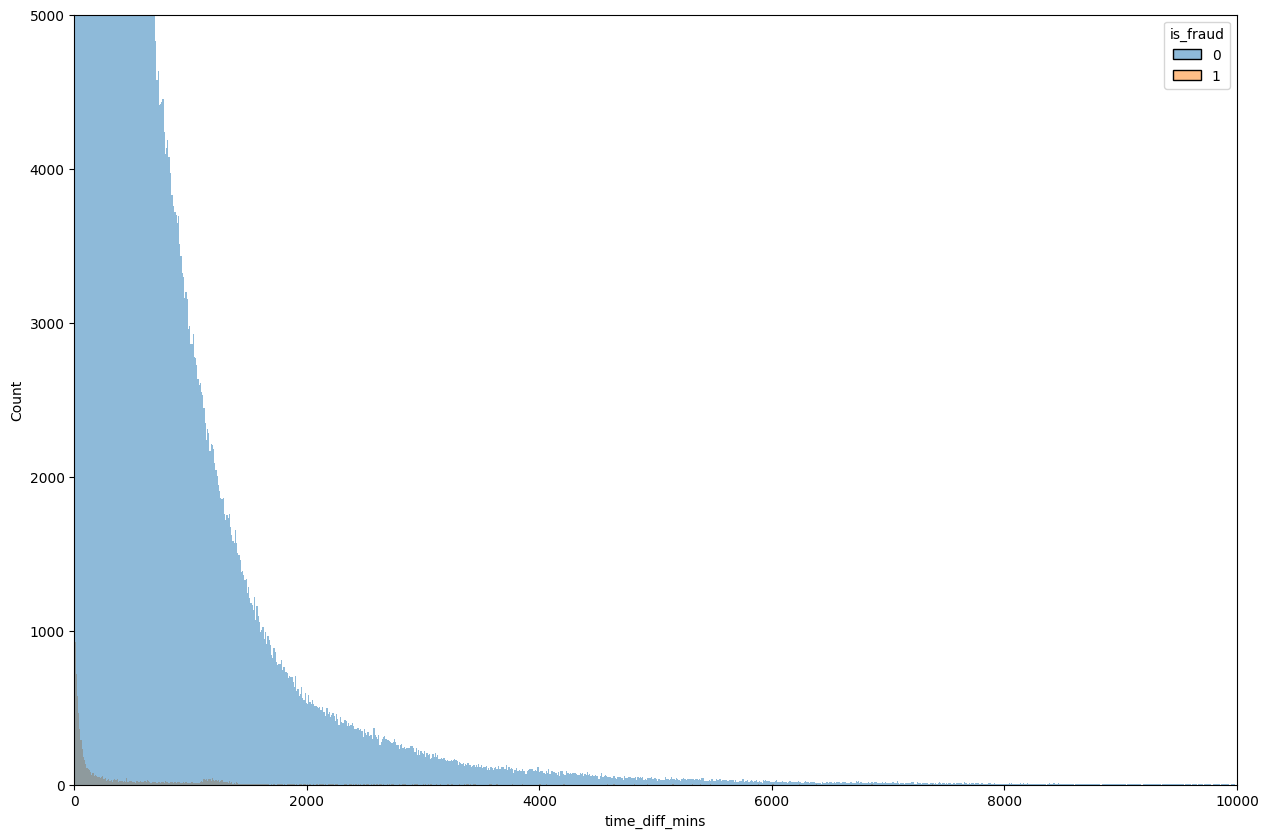

In [932]:
plt.figure(figsize=(15, 10))  

sns.histplot(x= 'time_diff_mins', hue= 'is_fraud', data= df)

plt.xlim(0, 10000) 
plt.ylim(0, 5000) 

plt.show()

In [933]:
df= df.sort_values(by=['merchant', 'trans_date_trans_time'], ascending= True)

In [934]:
df['time_diff_mer'] = df.groupby('merchant')['trans_date_trans_time'].diff()

In [935]:
df['time_diff_mer_mins'] = df['time_diff_mer'].dt.total_seconds() / 60

df['time_diff_mer_mins']

1251              NaN
1705       206.083333
2281       282.216667
2354        34.816667
2366         7.083333
              ...    
1292208     15.150000
1292816    299.216667
1294209    968.016667
1294632    212.333333
1295057    207.250000
Name: time_diff_mer_mins, Length: 1296675, dtype: float64

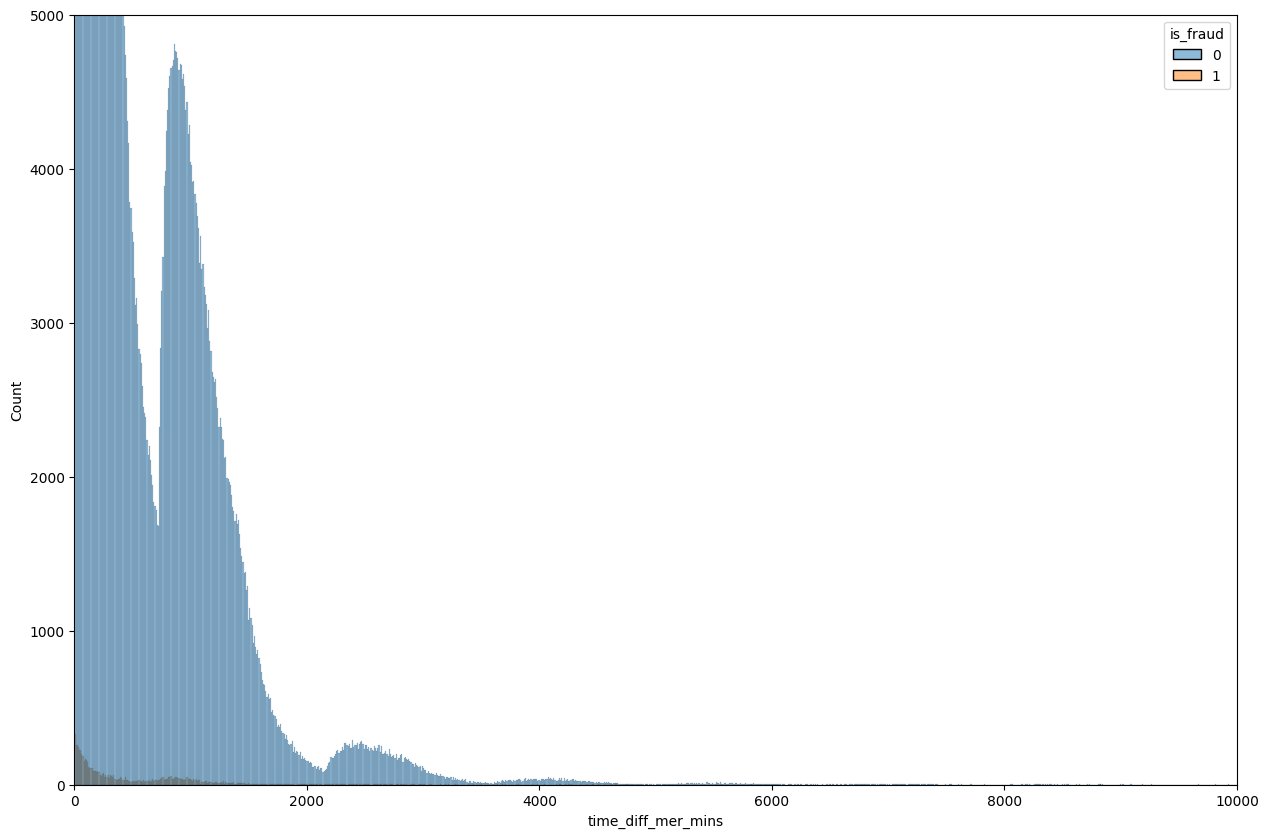

In [936]:
plt.figure(figsize=(15, 10))  

sns.histplot(x= 'time_diff_mer_mins', hue= 'is_fraud', data= df)

plt.xlim(0, 10000) 
plt.ylim(0, 5000) 

plt.show()

In [937]:
df['transaction_date'].nunique()

537

In [938]:
# datos de 1 año y medio

In [939]:
df['transaction_time']

1251       14:43:44
1705       18:09:49
2281       22:52:02
2354       23:26:51
2366       23:33:56
             ...   
1292208    17:58:28
1292816    22:57:41
1294209    15:05:42
1294632    18:38:02
1295057    22:05:17
Name: transaction_time, Length: 1296675, dtype: object

In [940]:
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)
df['minute'] = df['transaction_time'].apply(lambda x: x.minute)
df['second'] = df['transaction_time'].apply(lambda x: x.second)

In [941]:
df['hour'].nunique()

24

In [942]:
df['year'] = df['transaction_date'].apply(lambda x: x.year)
df['month'] = df['transaction_date'].apply(lambda x: x.month)
df['day'] = df['transaction_date'].apply(lambda x: x.day)

In [943]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,time_diff,time_diff_mins,time_diff_mer,time_diff_mer_mins,hour,minute,second,year,month,day
1251,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,0 days 13:54:19,834.316667,NaT,NaN,14,43,44,2019,1,1
1705,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,0 days 01:01:00,61.000000,0 days 03:26:05,206.083333,18,9,49,2019,1,1
2281,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,0 days 03:40:03,220.050000,0 days 04:42:13,282.216667,22,52,2,2019,1,1
2354,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,NaT,NaN,0 days 00:34:49,34.816667,23,26,51,2019,1,1
2366,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,0 days 02:30:31,150.516667,0 days 00:07:05,7.083333,23,33,56,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292208,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,0 days 01:09:35,69.583333,0 days 00:15:09,15.150000,17,58,28,2020,6,19
1292816,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,0 days 05:31:10,331.166667,0 days 04:59:13,299.216667,22,57,41,2020,6,19
1294209,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,0 days 15:48:22,948.366667,0 days 16:08:01,968.016667,15,5,42,2020,6,20
1294632,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,0 days 21:57:46,1317.766667,0 days 03:32:20,212.333333,18,38,2,2020,6,20


In [944]:
df_2019 = df[df['year']== 2019]

In [945]:
df.groupby('complete_name')['day'].count()

complete_name
Aaron_Murray        2050
Aaron_Pena          1476
Aaron_Rogers         508
Aaron_Stewart        537
Adam_Keller          521
                    ... 
William_Thompson    2052
Willie_Jordan       1038
Xavier_Beltran      1516
Zachary_Allen       1523
Zachary_Boone        495
Name: day, Length: 973, dtype: int64

In [946]:
df['transaction_date']

1251       2019-01-01
1705       2019-01-01
2281       2019-01-01
2354       2019-01-01
2366       2019-01-01
              ...    
1292208    2020-06-19
1292816    2020-06-19
1294209    2020-06-20
1294632    2020-06-20
1295057    2020-06-20
Name: transaction_date, Length: 1296675, dtype: object

In [947]:
media_trans_por_dia= df.groupby(['complete_name', 'transaction_date'])['trans_date_trans_time'].count().reset_index(name='count').groupby('complete_name')['count'].mean().reset_index()



In [948]:
df['transactions_per_day'] = df.groupby(['complete_name', df['trans_date_trans_time'].dt.date])['trans_date_trans_time'].transform('size')

# Calcular la media de transacciones por día por cliente
df['mean_transactions_per_day'] = df.groupby('complete_name')['transactions_per_day'].transform('mean')

# Crear columna dummy que indique si el número de transacciones duplica la media por día por cliente
df['is_3x_above_mean'] = df['transactions_per_day'] > (3 * df['mean_transactions_per_day'])

df['is_3x_above_mean'] = df['is_3x_above_mean'].astype(int)

df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,time_diff_mer_mins,hour,minute,second,year,month,day,transactions_per_day,mean_transactions_per_day,is_3x_above_mean
1251,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,NaN,14,43,44,2019,1,1,3,2.169231,0
1705,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,206.083333,18,9,49,2019,1,1,10,6.688590,0
2281,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,282.216667,22,52,2,2019,1,1,6,5.347994,0
2354,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,34.816667,23,26,51,2019,1,1,1,2.054688,0
2366,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,7.083333,23,33,56,2019,1,1,4,5.397485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292208,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,15.150000,17,58,28,2020,6,19,11,7.917532,0
1292816,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,299.216667,22,57,41,2020,6,19,3,5.588235,0
1294209,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,968.016667,15,5,42,2020,6,20,1,4.608472,0
1294632,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,212.333333,18,38,2,2020,6,20,6,7.737360,0


In [949]:
df['mean_amt_transactions_per_day_per_cust'] = df.groupby('complete_name')['amt'].transform('mean')

# Crear una columna dummy basada en si el monto de transacciones por día duplica la media
df['amt_is_300tim_mean_per day'] = df['amt'] >= (df['mean_transactions_per_day'] * 5)
df['amt_is_300tim_mean_per day']= df['amt_is_300tim_mean_per day'].astype(int)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,minute,second,year,month,day,transactions_per_day,mean_transactions_per_day,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day
1251,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,43,44,2019,1,1,3,2.169231,0,104.715308,1
1705,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,9,49,2019,1,1,10,6.688590,0,88.146133,0
2281,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,52,2,2019,1,1,6,5.347994,0,66.700754,0
2354,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,26,51,2019,1,1,1,2.054688,0,71.139902,1
2366,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,33,56,2019,1,1,4,5.397485,0,95.369381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292208,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,58,28,2020,6,19,11,7.917532,0,88.967494,0
1292816,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,57,41,2020,6,19,3,5.588235,0,90.289835,1
1294209,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,5,42,2020,6,20,1,4.608472,0,64.813383,0
1294632,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,38,2,2020,6,20,6,7.737360,0,89.186195,0


In [950]:
df['amt_is_300tim_mean_per day'].value_counts()

amt_is_300tim_mean_per day
1    829447
0    467228
Name: count, dtype: int64

In [951]:
df['is_3x_above_mean'].value_counts()

is_3x_above_mean
0    1292450
1       4225
Name: count, dtype: int64

In [952]:
df.groupby('is_fraud')['is_3x_above_mean'].count()

is_fraud
0    1289169
1       7506
Name: is_3x_above_mean, dtype: int64

In [953]:
fraud_percentage = df.groupby('is_3x_above_mean')['is_fraud'].mean() * 100

print(fraud_percentage)

is_3x_above_mean
0     0.532632
1    14.721893
Name: is_fraud, dtype: float64


In [954]:
df['month'].nunique()

12

In [955]:
df['state'].nunique()

51

In [956]:
df['city'].nunique()

894

In [957]:
df['merchant'].nunique()

693

In [958]:
df['complete_name'].nunique()

973

In [959]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'fraud_trans_per_city', 'is_fraud_city',
       'fraud_trans_per_zip', 'is_fraud_zip', 'fraud_trans_per_merchant',
       'is_fraud_merchant', 'fraud_trans_per_category', 'is_fraud_category',
       'complete_name', 'transaction_date', 'transaction_time', 'time_diff',
       'time_diff_mins', 'time_diff_mer', 'time_diff_mer_mins', 'hour',
       'minute', 'second', 'year', 'month', 'day', 'transactions_per_day',
       'mean_transactions_per_day', 'is_3x_above_mean',
       'mean_amt_transactions_per_day_per_cust', 'amt_is_300tim_mean_per day'],
      dtype='object')

In [960]:
# Media y la mediana de las transacciones por cliente
mean_by_customer = df.groupby('complete_name')['amt'].mean().rename('mean_transaction_by_customer')
median_by_customer = df.groupby('complete_name')['amt'].median().rename('median_transaction_by_customer')

# Media y la mediana de las transacciones por comercio
mean_by_merchant = df.groupby('merchant')['amt'].mean().rename('mean_transaction_by_merchant')
median_by_merchant = df.groupby('merchant')['amt'].median().rename('median_transaction_by_merchant')

In [961]:
mean_by_customer.sort_values(ascending=False)

complete_name
Robin_Davis           948.818182
Rachel_Terrell        918.425556
Kelly_Lawrence        874.505714
Diana_Rodgers         858.480000
Alex_Singh            833.969000
                         ...    
Robert_Haynes          46.982659
Thomas_Sullivan        46.936671
Rebecca_Conley         46.886541
Amy_Daugherty          44.717345
Michelle_Rodriguez     42.951671
Name: mean_transaction_by_customer, Length: 973, dtype: float64

In [962]:
median_by_customer.sort_values(ascending=False)

complete_name
Rachel_Terrell      1031.240
Alex_Singh           998.255
Robin_Davis          972.280
Benjamin_Beck        953.590
Kelly_Lawrence       949.440
                      ...   
Gary_Martinez         20.740
Jasmine_Wade          20.700
Victoria_Fleming      20.260
Amy_Daugherty         17.030
Eric_Patel            16.640
Name: median_transaction_by_customer, Length: 973, dtype: float64

In [963]:
#df = df.join(mean_by_customer, on='complete_name')
#df = df.join(median_by_customer, on='complete_name')
#df = df.join(mean_by_merchant, on='merchant')
#df = df.join(median_by_merchant, on='merchant')

In [964]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [965]:
df[df['is_fraud'] == 1]['complete_name']

52459           Lindsay_Wilson
290130             Kendra_King
686157       Olivia_Stephenson
26414           Dorothy_Zuniga
29650            Rick_Martinez
                  ...         
1011449         Charles_Moreno
1097804    Christopher_Johnson
1171170          Matthew_Young
444906         Kimberly_Martin
932425          Grace_Williams
Name: complete_name, Length: 7506, dtype: object

In [966]:
df[df['is_fraud'] == 1]['complete_name'].value_counts()

complete_name
Scott_Martin        27
Jennifer_Scott      26
Robert_James        22
Linda_Davis         20
Susan_Garcia        20
                    ..
Sabrina_Nolan        2
Katherine_Tucker     2
William_Perry        2
Rebecca_Erickson     2
Jessica_Ward         2
Name: count, Length: 754, dtype: int64

In [967]:
df[df['is_fraud'] == 1]['complete_name'].unique()

array(['Lindsay_Wilson', 'Kendra_King', 'Olivia_Stephenson',
       'Dorothy_Zuniga', 'Rick_Martinez', 'Allison_Allen', 'Monica_West',
       'Amanda_Adams', 'Kevin_Pena', 'Larry_House', 'Amber_Thornton',
       'Melissa_Flores', 'Mark_Wood', 'Rita_Myers', 'Gail_Weaver',
       'Scott_Fuller', 'Robert_Flores', 'Ronald_White', 'Vincent_Mueller',
       'Cynthia_Davis', 'Christopher_Rodgers', 'Valerie_Clark',
       'Gabriella_Jordan', 'Cody_Hooper', 'Brooke_Smith', 'Linda_Sanchez',
       'Eric_Patel', 'Dustin_Roberts', 'Bradley_Adkins', 'Gerald_Frank',
       'Michael_Rivera', 'Jesse_Roberts', 'Jack_Hill',
       'Jennifer_Gonzalez', 'Kyle_Park', 'Mary_Rodriguez',
       'John_Chandler', 'Benjamin_Beck', 'Randall_Burgess',
       'David_Rodriguez', 'Jason_Singh', 'Christine_Harris',
       'Patricia_Russell', 'Paul_Wade', 'Bianca_Scott', 'Judy_Hogan',
       'Warren_Daniels', 'Alex_Singh', 'Scott_Martin', 'Becky_Mckinney',
       'Melissa_Aguilar', 'Karen_Gordon', 'Dawn_Stephens',
    

In [968]:
# todos estas personas han cometido fraude más de una vez

In [969]:
fraud_counts = df[df['is_fraud'] == 1]['complete_name'].value_counts()

In [970]:
fraud_counts

complete_name
Scott_Martin        27
Jennifer_Scott      26
Robert_James        22
Linda_Davis         20
Susan_Garcia        20
                    ..
Sabrina_Nolan        2
Katherine_Tucker     2
William_Perry        2
Rebecca_Erickson     2
Jessica_Ward         2
Name: count, Length: 754, dtype: int64

In [971]:
frequent_fraudsters= []

for name in df['complete_name']:
    if name in fraud_counts.index:
        frequent_fraudsters.append(name)
    else:
        continue

In [972]:
frequent_fraudsters

['Guy_Thompson',
 'Allison_Ayala',
 'Audrey_Martinez',
 'Ryan_Joseph',
 'Barbara_Norman',
 'Jodi_Rodriguez',
 'Jessica_Dominguez',
 'Robert_Flores',
 'James_Baldwin',
 'Christopher_Carr',
 'Travis_Hayes',
 'Christine_Harris',
 'Kristina_Stewart',
 'Jose_Vasquez',
 'Paula_Estrada',
 'Omar_Gay',
 'Kathleen_Heath',
 'Scott_Martin',
 'Carrie_Lewis',
 'Scott_Cole',
 'Ryan_Joseph',
 'Dustin_Roberts',
 'Stacy_Villegas',
 'Cynthia_Davis',
 'Sabrina_Nolan',
 'Gina_Morrison',
 'Daniel_Martinez',
 'Ryan_Joseph',
 'David_Serrano',
 'Michelle_Johnston',
 'Joseph_Gonzalez',
 'Robert_Holland',
 'Robert_Ashley',
 'Susan_Washington',
 'Gerald_Anthony',
 'Stacy_Lambert',
 'Lisa_Hendrix',
 'Rebecca_Obrien',
 'David_Lewis',
 'Barbara_Norman',
 'Larry_Vaughan',
 'Andrew_Patterson',
 'Joseph_Davis',
 'Gregory_Wallace',
 'Savannah_Lewis',
 'Katherine_Love',
 'Robert_Sanchez',
 'Sarah_Bell',
 'Christopher_Farrell',
 'Jeffrey_Smith',
 'Kenneth_Foster',
 'Melissa_Meza',
 'Kristen_Allen',
 'James_Lynch',
 'Josep

In [973]:
df['is_frequent_fraudster'] = df['complete_name'].isin(frequent_fraudsters).astype(int)

In [974]:
# #frequent_fraudsters = fraud_counts[fraud_counts > 5].index

# df['is_frequent_fraudster'] = df['fraud_counts'].apply(lambda x: 1 if x > 5 else 0)

In [975]:
df['is_frequent_fraudster'].value_counts()

is_frequent_fraudster
1    978904
0    317771
Name: count, dtype: int64

In [976]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,second,year,month,day,transactions_per_day,mean_transactions_per_day,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day,is_frequent_fraudster
1251,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,44,2019,1,1,3,2.169231,0,104.715308,1,1
1705,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,49,2019,1,1,10,6.688590,0,88.146133,0,1
2281,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,2,2019,1,1,6,5.347994,0,66.700754,0,0
2354,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,51,2019,1,1,1,2.054688,0,71.139902,1,1
2366,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,56,2019,1,1,4,5.397485,0,95.369381,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292208,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,28,2020,6,19,11,7.917532,0,88.967494,0,1
1292816,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,41,2020,6,19,3,5.588235,0,90.289835,1,1
1294209,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,42,2020,6,20,1,4.608472,0,64.813383,0,1
1294632,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,2,2020,6,20,6,7.737360,0,89.186195,0,1


In [977]:
fraudulent_transactions = df[df['is_fraud'] == 1]

# Calcular el monto total de las transacciones fraudulentas por cada persona (cliente)
fraudulent_amount_per_customer = fraudulent_transactions.groupby('complete_name')['amt'].sum().reset_index(name='total_fraudulent_amount')
print("Monto total de transacciones fraudulentas por cliente:")
print(fraudulent_amount_per_customer.sort_values(by= 'total_fraudulent_amount', ascending= False))

Monto total de transacciones fraudulentas por cliente:
        complete_name  total_fraudulent_amount
324    Jennifer_Scott                 14319.39
656      Scott_Martin                 13656.63
541   Micheal_Walters                 12011.59
686      Susan_Garcia                 11457.11
117   Charles_Preston                 11061.27
..                ...                      ...
414  Katherine_Tucker                   341.06
596  Rebecca_Erickson                   280.15
436   Kimberly_Martin                    55.21
634     Sabrina_Nolan                    25.40
746     William_Perry                    20.44

[754 rows x 2 columns]


In [978]:
df.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

In [979]:
df.groupby('is_fraud')['amt'].median()

is_fraud
0     47.280
1    396.505
Name: amt, dtype: float64

In [980]:
df[df['is_fraud'] == 1]['amt'].sum()

3988088.6100000003

In [981]:
fraudulent_transactions_amt = df[df['is_fraud'] == 1]['amt'].sum()

In [982]:
total_transactions_amt= df['amt'].sum()

In [983]:
len(df['is_fraud'])

1296675

In [984]:
total_transactions= len(df['is_fraud'])

In [985]:
len(fraudulent_transactions)

7506

In [986]:
print("El numero de transacciones fraudulentas sobre el total es de un", (len(fraudulent_transactions)/total_transactions) * 100, "%")

El numero de transacciones fraudulentas sobre el total es de un 0.5788651743883394 %


In [987]:
print("El monto de transacciones fraudulentas sobre el total de transacciones es de un", (fraudulent_transactions_amt/total_transactions_amt) *100, "%")

El monto de transacciones fraudulentas sobre el total de transacciones es de un 4.371829009696543 %


In [988]:
transactions_per_customer = df.groupby('complete_name').size().reset_index(name='num_transactions_per_customer')

In [989]:
transactions_per_merchant = df.groupby('merchant').size().reset_index(name='num_transactions_per_merchant')

In [990]:
transactions_per_customer.sort_values(by='num_transactions_per_customer', ascending= False)

,complete_name,num_transactions_per_customer
844,Scott_Martin,4618
413,Jeffrey_Smith,3592
713,Monica_Cohen,3123
86,Barbara_Taylor,3123
448,Jessica_Perez,3119
...,...,...
710,Misty_Hart,7
171,Christina_Norris,7
59,Angelica_Lopez,7
820,Samantha_Ramirez,7


In [991]:
transactions_per_merchant.sort_values(by='num_transactions_per_merchant', ascending= False)

,merchant,num_transactions_per_merchant
316,fraud_Kilback LLC,4403
105,fraud_Cormier LLC,3649
571,fraud_Schumm PLC,3634
349,fraud_Kuhn LLC,3510
70,fraud_Boyer PLC,3493
...,...,...
633,fraud_Treutel-King,775
143,"fraud_Douglas, DuBuque and McKenzie",775
423,"fraud_Medhurst, Labadie and Gottlieb",759
505,fraud_Reichert-Weissnat,753


In [992]:
df['state'].unique()

array(['NE', 'FL', 'IA', 'IN', 'VA', 'NY', 'AR', 'AL', 'CA', 'WV', 'NC',
       'NH', 'VT', 'NJ', 'TX', 'SD', 'NM', 'MD', 'NV', 'CO', 'OR', 'OH',
       'PA', 'KY', 'MO', 'TN', 'GA', 'SC', 'IL', 'MT', 'MA', 'WY', 'UT',
       'MI', 'RI', 'ND', 'WA', 'AZ', 'OK', 'KS', 'MS', 'WI', 'MN', 'LA',
       'ID', 'ME', 'HI', 'DC', 'CT', 'AK', 'DE'], dtype=object)

In [993]:
df['amt_over_300'] = (df['amt'] > 800).astype(int)

In [994]:
fraud_counts_city = df[df['is_fraud'] == 1]['city'].value_counts()


In [995]:
df.shape

(1296675, 48)

,state,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score
0,NV,0.1200,3350,0.209,701
1,FL,0.1066,3450,0.196,706
2,AR,0.1023,2380,0.153,694
3,TX,0.0943,3190,0.175,692
4,AZ,0.0940,3060,0.185,710
5,OK,0.0916,2530,0.164,692
6,CA,0.0907,3330,0.215,721
7,NM,0.0907,2540,0.177,699
8,NY,0.0894,3520,0.213,722
9,GA,0.0891,3210,0.163,693


In [997]:
list1 = ['NE', 'FL', 'IA', 'IN', 'VA', 'NY', 'AR', 'AL', 'CA', 'WV', 'NC',
         'NH', 'VT', 'NJ', 'TX', 'SD', 'NM', 'MD', 'NV', 'CO', 'OR', 'OH',
         'PA', 'KY', 'MO', 'TN', 'GA', 'SC', 'IL', 'MT', 'MA', 'WY', 'UT',
         'MI', 'RI', 'ND', 'WA', 'AZ', 'OK', 'KS', 'MS', 'WI', 'MN', 'LA',
         'ID', 'ME', 'HI', 'DC', 'CT', 'AK', 'DE']
list3 = ['NV', 'FL', 'AR', 'TX', 'AZ', 'OK', 'CA', 'NM', 'NY', 'GA', 'MS', 
         'SC', 'LA', 'AL', 'DE', 'WV', 'NC', 'TN', 'PA', 'KY', 'MO', 'MD', 
         'AK', 'RI', 'WY', 'NJ', 'MA', 'HI', 'OH', 'CT', 'IN', 'IL', 'KS', 
         'OR', 'MI', 'NE', 'ID', 'MT', 'IA', 'VA', 'CO', 'NH', 'SD', 'ME', 
         'ND', 'VT', 'MN', 'WA', 'UT', 'WI']

# Convertir listas a conjuntos
set1 = set(list1)
set2 = set(list3)

# Encontrar estados que están en set1 pero no en set2
unique_to_list1 = set1 - set2

# Encontrar estados que están en set2 pero no en set1
unique_to_list2 = set2 - set1

print("Estados en list1 pero no en list2:", unique_to_list1)
print("Estados en list2 pero no en list1:", unique_to_list2)

Estados en list1 pero no en list2: {'DC'}
Estados en list2 pero no en list1: set()


,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,mean_transactions_per_day,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day,is_frequent_fraudster,amt_over_300,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score
0,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,2.169231,0,104.715308,1,1,0,0.0672,2730,0.183,731
1,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,6.688590,0,88.146133,0,1,0,0.1066,3450,0.196,706
2,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,5.347994,0,66.700754,0,0,0,0.0665,2450,0.162,729
3,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,2.054688,0,71.139902,1,1,0,0.0708,2430,0.158,712
4,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,5.397485,0,95.369381,1,1,0,0.0660,3560,0.201,721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293057,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,7.917532,0,88.967494,0,1,0,0.0738,3700,0.212,725
1293058,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,5.588235,0,90.289835,1,1,0,0.0682,2700,0.183,721
1293059,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,4.608472,0,64.813383,0,1,0,0.0534,2510,0.177,735
1293060,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,7.737360,0,89.186195,0,1,0,0.0877,2150,0.123,681


In [999]:
merged_df1.shape

(1293062, 52)

In [1000]:
merged_df1[['credit_card_delinq_rate_90_days',	'Per_capita_creditcard_debt',	'Credit_card_debt_as_share_non-mortgage debt',	'Av_cred_score']]

,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score
0,0.0672,2730,0.183,731
1,0.1066,3450,0.196,706
2,0.0665,2450,0.162,729
3,0.0708,2430,0.158,712
4,0.0660,3560,0.201,721
...,...,...,...,...
1293057,0.0738,3700,0.212,725
1293058,0.0682,2700,0.183,721
1293059,0.0534,2510,0.177,735
1293060,0.0877,2150,0.123,681


In [1001]:
merged_df1['Per_capita_creditcard_debt_dummy'] = merged_df1['Per_capita_creditcard_debt'] > 3500
merged_df1['Per_capita_creditcard_debt_dummy'] = merged_df1['Per_capita_creditcard_debt_dummy'].astype(int)
merged_df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day,is_frequent_fraudster,amt_over_300,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score,Per_capita_creditcard_debt_dummy
0,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,0,104.715308,1,1,0,0.0672,2730,0.183,731,0
1,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,0,88.146133,0,1,0,0.1066,3450,0.196,706,0
2,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,0,66.700754,0,0,0,0.0665,2450,0.162,729,0
3,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,0,71.139902,1,1,0,0.0708,2430,0.158,712,0
4,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,0,95.369381,1,1,0,0.0660,3560,0.201,721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293057,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,0,88.967494,0,1,0,0.0738,3700,0.212,725,1
1293058,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,0,90.289835,1,1,0,0.0682,2700,0.183,721,0
1293059,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,0,64.813383,0,1,0,0.0534,2510,0.177,735,0
1293060,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,0,89.186195,0,1,0,0.0877,2150,0.123,681,0


### ANÁLISIS EXPLORATORIO

In [1002]:
num_cols= df.select_dtypes(include=['number'])

In [1003]:
#for i in num_cols:
#    sns.histplot(num_cols[i])

In [1004]:
#sns.pairplot(num_cols, hue= 'is_fraud')

In [1005]:
#correlation_matrix = numeric_df.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Heatmap de la correlación de las columnas numéricas')
#plt.show()

### ESCALAR LOS DATOS

In [1006]:
X = merged_df1[['amt', 'is_3x_above_mean', 'is_fraud_zip', 'is_frequent_fraudster']]
X

,amt,is_3x_above_mean,is_fraud_zip,is_frequent_fraudster
0,74.63,0,0,1
1,33.40,0,0,1
2,11.95,0,0,0
3,31.06,0,0,1
4,71.16,0,0,1
...,...,...,...,...
1293057,11.80,0,0,1
1293058,37.24,0,0,1
1293059,18.42,0,0,1
1293060,13.13,0,0,1


In [1007]:
y= merged_df1['is_fraud']
y

0          0
1          0
2          0
3          0
4          0
          ..
1293057    0
1293058    0
1293059    0
1293060    0
1293061    0
Name: is_fraud, Length: 1293062, dtype: int64

In [1008]:
y.value_counts()

is_fraud
0    1285577
1       7485
Name: count, dtype: int64

In [1009]:
# df_combined2 = pd.concat([X, y], axis=1)

In [1239]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [1240]:
X_scaled= pd.DataFrame(X_scaled)

X_scaled

,0,1,2,3
0,0.002544,0.0,0.0,1.0
1,0.001119,0.0,0.0,1.0
2,0.000378,0.0,0.0,0.0
3,0.001038,0.0,0.0,1.0
4,0.002424,0.0,0.0,1.0
...,...,...,...,...
1293057,0.000373,0.0,0.0,1.0
1293058,0.001252,0.0,0.0,1.0
1293059,0.000602,0.0,0.0,1.0
1293060,0.000419,0.0,0.0,1.0


In [1241]:
nuevos_nombres = {
    0: 'amt',
    1: 'is_3x_above_mean',
    2: 'is_fraud_zip',
    3: 'is_frequent_fraudster'
}

In [1242]:
X_scaled = X_scaled.rename(columns=nuevos_nombres)

In [1243]:
X_scaled

,amt,is_3x_above_mean,is_fraud_zip,is_frequent_fraudster
0,0.002544,0.0,0.0,1.0
1,0.001119,0.0,0.0,1.0
2,0.000378,0.0,0.0,0.0
3,0.001038,0.0,0.0,1.0
4,0.002424,0.0,0.0,1.0
...,...,...,...,...
1293057,0.000373,0.0,0.0,1.0
1293058,0.001252,0.0,0.0,1.0
1293059,0.000602,0.0,0.0,1.0
1293060,0.000419,0.0,0.0,1.0


### DIVIDIR EN TRAIN Y TEST

In [1244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [1016]:
#from sklearn.preprocessing import StandardScaler

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
#scaler = StandardScaler()
#scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

### REBALANCEO DEL TARGET EN TRAIN

In [1017]:
# !pip install imblearn

In [1245]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [1246]:
merged_df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'fraud_trans_per_city', 'is_fraud_city',
       'fraud_trans_per_zip', 'is_fraud_zip', 'fraud_trans_per_merchant',
       'is_fraud_merchant', 'fraud_trans_per_category', 'is_fraud_category',
       'complete_name', 'transaction_date', 'transaction_time', 'time_diff',
       'time_diff_mins', 'time_diff_mer', 'time_diff_mer_mins', 'hour',
       'minute', 'second', 'year', 'month', 'day', 'transactions_per_day',
       'mean_transactions_per_day', 'is_3x_above_mean',
       'mean_amt_transactions_per_day_per_cust', 'amt_is_300tim_mean_per day',
       'is_frequent_fraudster', 'amt_over_300',
       'credit_card_delinq_rate_90_days', 'Per_capita_creditcard_debt',
       'Credit_card_debt_as_share_non-mortgage debt', 'Av_cred_score',
       'Per_ca

In [1247]:
X3= merged_df1[['amt', 'is_3x_above_mean', 'is_fraud_zip', 'is_frequent_fraudster']]
X3

,amt,is_3x_above_mean,is_fraud_zip,is_frequent_fraudster
0,74.63,0,0,1
1,33.40,0,0,1
2,11.95,0,0,0
3,31.06,0,0,1
4,71.16,0,0,1
...,...,...,...,...
1293057,11.80,0,0,1
1293058,37.24,0,0,1
1293059,18.42,0,0,1
1293060,13.13,0,0,1


In [1248]:
merged_df1

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,is_3x_above_mean,mean_amt_transactions_per_day_per_cust,amt_is_300tim_mean_per day,is_frequent_fraudster,amt_over_300,credit_card_delinq_rate_90_days,Per_capita_creditcard_debt,Credit_card_debt_as_share_non-mortgage debt,Av_cred_score,Per_capita_creditcard_debt_dummy
0,2019-01-01 14:43:44,4666314527820883145,fraud_Abbott-Rogahn,entertainment,74.63,M,5812 Ramos Oval Suite 598,Ravenna,NE,68869,...,0,104.715308,1,1,0,0.0672,2730,0.183,731,0
1,2019-01-01 18:09:49,30044330818990,fraud_Abbott-Rogahn,entertainment,33.40,F,87665 Karen Mill Apt. 586,Fort Myers,FL,33967,...,0,88.146133,0,1,0,0.1066,3450,0.196,706,0
2,2019-01-01 22:52:02,4623560839669,fraud_Abbott-Rogahn,entertainment,11.95,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,...,0,66.700754,0,0,0,0.0665,2450,0.162,729,0
3,2019-01-01 23:26:51,560881134780,fraud_Abbott-Rogahn,entertainment,31.06,F,343 Joshua Views,Liberty Mills,IN,46946,...,0,71.139902,1,1,0,0.0708,2430,0.158,712,0
4,2019-01-01 23:33:56,4446368897795790,fraud_Abbott-Rogahn,entertainment,71.16,M,8850 Jessica Center,Atlantic,VA,23303,...,0,95.369381,1,1,0,0.0660,3560,0.201,721,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293057,2020-06-19 17:58:28,180048185037117,fraud_Zulauf LLC,personal_care,11.80,F,2481 Mills Lock,Plainfield,NJ,7060,...,0,88.967494,0,1,0,0.0738,3700,0.212,725,1
1293058,2020-06-19 22:57:41,30074693890476,fraud_Zulauf LLC,personal_care,37.24,F,889 Sarah Station Suite 624,Holcomb,KS,67851,...,0,90.289835,1,1,0,0.0682,2700,0.183,721,0
1293059,2020-06-20 15:05:42,5388659976630693,fraud_Zulauf LLC,personal_care,18.42,M,5364 William Harbor,Seneca,WI,54654,...,0,64.813383,0,1,0,0.0534,2510,0.177,735,0
1293060,2020-06-20 18:38:02,213141712584544,fraud_Zulauf LLC,personal_care,13.13,F,742 Oneill Shore,Florence,MS,39073,...,0,89.186195,0,1,0,0.0877,2150,0.123,681,0


In [1249]:
X10= merged_df1[['credit_card_delinq_rate_90_days', 	'Per_capita_creditcard_debt', 	'Credit_card_debt_as_share_non-mortgage debt',	'Av_cred_score']]

In [1250]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


rus3 = RandomUnderSampler(random_state=42)
X_rus3, y_rus3 = rus3.fit_resample(X_train3, y_train3)

In [1251]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


rus10 = RandomUnderSampler(random_state=42)
X_rus10, y_rus10 = rus10.fit_resample(X_train10, y_train10)

In [1252]:
# X_rus= pd.DataFrame(X_rus)
# y_rus= pd.DataFrame(y_rus)
# X_ros= pd.DataFrame(X_ros)
# y_ros= pd.DataFrame(y_ros)

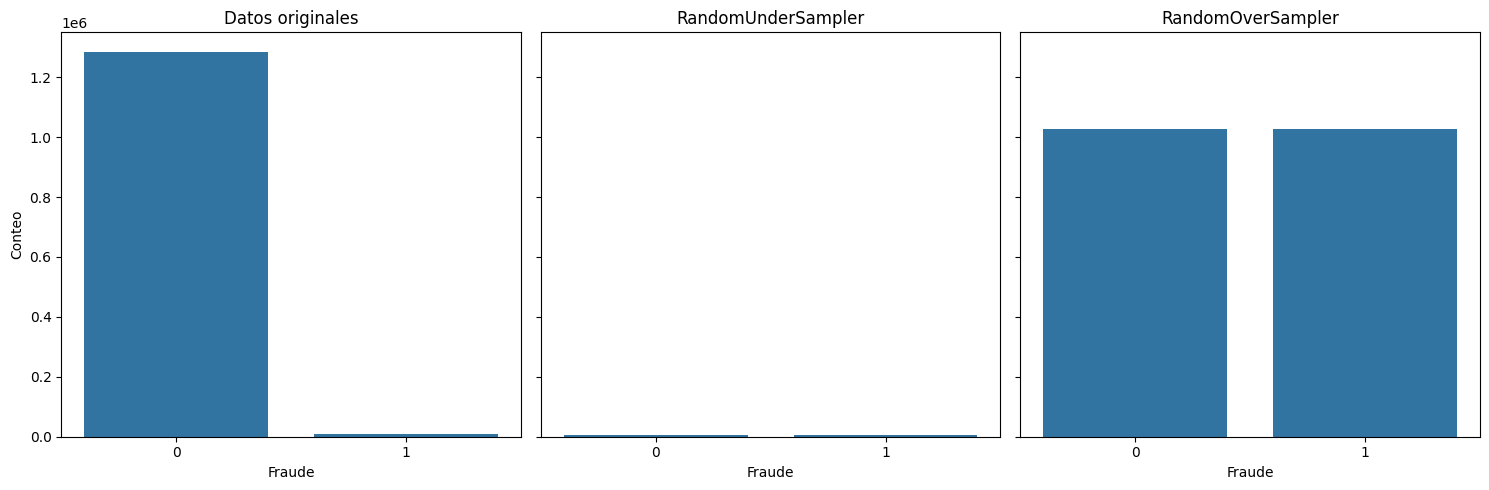

In [1118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Original target
sns.countplot(x=y, data=df, ax=axes[0])
axes[0].set_title("Datos originales")
axes[0].set_xlabel("Fraude")
axes[0].set_ylabel("Conteo")

# RandomUnderSampler
sns.countplot(x=y_rus, ax=axes[1])
axes[1].set_title("RandomUnderSampler")
axes[1].set_xlabel("Fraude")
axes[1].set_ylabel("")

# RandomOverSampler
sns.countplot(x=y_ros, ax=axes[2])
axes[2].set_title("RandomOverSampler")
axes[2].set_xlabel("Fraude")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

**Algunas consideraciones antes de utilizar esta técnica**
- Nunca testear sobre el conjunto sampleado. Siempre sobre el conjunto de test original 
- Si realizamos CrossValidation, siempre samplear DURANTE el CrossValidation, no antes. Es decir, meterlo en el Pipeline.

In [1253]:
df_combined = pd.concat([X_rus, y_rus], axis=1)

In [1254]:
df_combined10 = pd.concat([X_rus10, y_rus10], axis=1)

In [1255]:
df_combined3 = pd.concat([X_rus3, y_rus3], axis=1)

In [1256]:
df_combined3['is_frequent_fraudster'].value_counts()

is_frequent_fraudster
1    10445
0     1479
Name: count, dtype: int64

In [1032]:
# variables = ['credit_card_delinq_rate_90_days', 'Per_capita_creditcard_debt',
#              'Credit_card_debt_as_share_non-mortgage debt', 'Av_cred_score']

# Crear el pairplot
# sns.pairplot(merged_df1[variables], hue='is_fraud')
# plt.show()

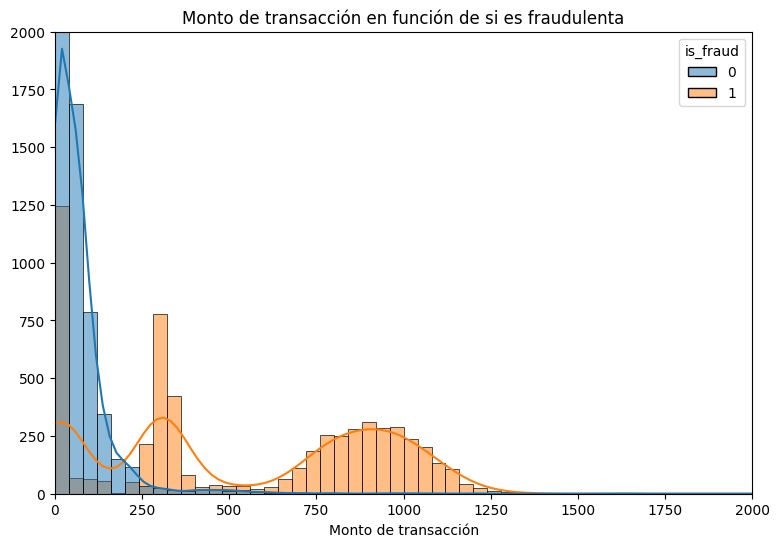

In [1033]:
plt.figure(figsize=(9, 6))

sns.histplot(data=df_combined3, x='amt', hue='is_fraud', kde=True)

plt.xlim(0, 2000)
plt.ylim(0, 2000)


plt.title('Monto de transacción en función de si es fraudulenta')
plt.xlabel('Monto de transacción')
plt.ylabel('')


plt.show()

In [1034]:
fraud_counts[fraud_counts > 20].index

Index(['Scott_Martin', 'Jennifer_Scott', 'Robert_James'], dtype='object', name='complete_name')

In [1035]:
fraud_counts[fraud_counts > 20].index

Index(['Scott_Martin', 'Jennifer_Scott', 'Robert_James'], dtype='object', name='complete_name')

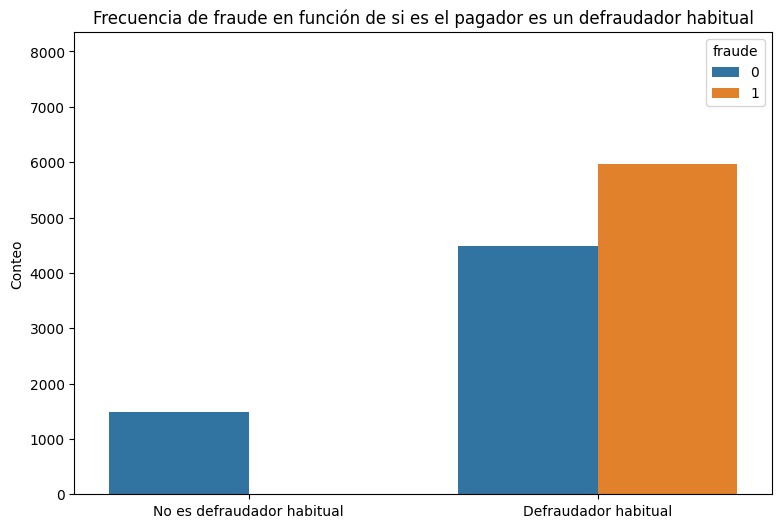

In [1036]:
plt.figure(figsize=(9, 6))

# Crear el gráfico countplot con Seaborn
sns.countplot(data=df_combined3, x='is_frequent_fraudster', hue='is_fraud')

# Ajustar los límites de los ejes
plt.xlim(-0.5, 1.5)  # Ajustar los límites del eje x para centrar las barras
plt.ylim(0, df_combined3.shape[0] * 0.7)  # Ajustar los límites del eje y según el máximo de conteos

# Añadir título y etiquetas
plt.title('Frecuencia de fraude en función de si es el pagador es un defraudador habitual')
plt.ylabel('Conteo')
plt.xlabel('')

plt.xticks(ticks=[0, 1], labels=['No es defraudador habitual', 'Defraudador habitual'])

# Mostrar la leyenda
plt.legend(title='fraude', loc='upper right')

# Mostrar el gráfico
plt.show()

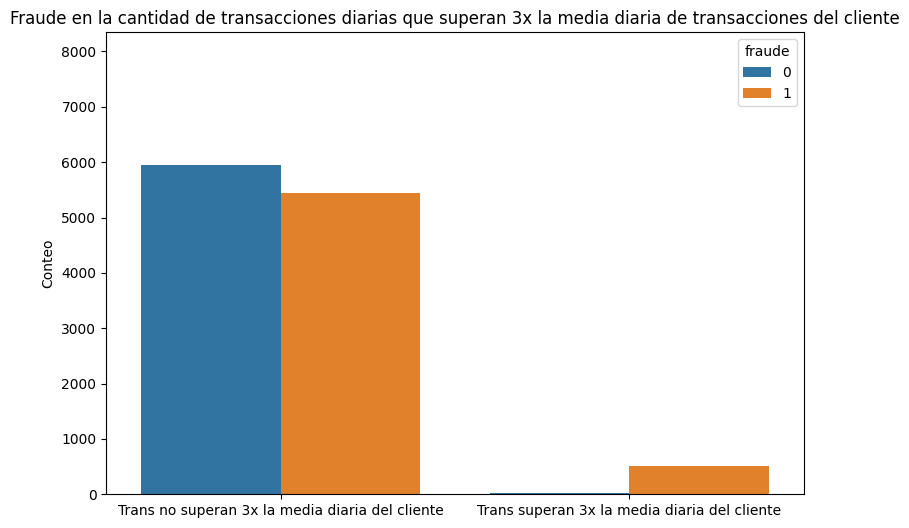

In [1037]:
plt.figure(figsize=(9, 6))

# Crear el gráfico countplot con Seaborn
sns.countplot(data=df_combined3, x='is_3x_above_mean', hue='is_fraud')

# Ajustar los límites de los ejes
plt.xlim(-0.5, 1.5)  # Ajustar los límites del eje x para centrar las barras
plt.ylim(0, df_combined3.shape[0] * 0.7)  # Ajustar los límites del eje y según el máximo de conteos

# Añadir título y etiquetas
plt.title('Fraude en la cantidad de transacciones diarias que superan 3x la media diaria de transacciones del cliente')
plt.ylabel('Conteo')
plt.xlabel('')

plt.xticks(ticks=[0, 1], labels=['Trans no superan 3x la media diaria del cliente', 'Trans superan 3x la media diaria del cliente'])

# Mostrar la leyenda
plt.legend(title='fraude', loc='upper right')

# Mostrar el gráfico
plt.show()

In [1038]:
df['is_3x_above_mean'].value_counts()

is_3x_above_mean
0    1292450
1       4225
Name: count, dtype: int64

In [1039]:
df['is_frequent_fraudster'].value_counts()

is_frequent_fraudster
1    978904
0    317771
Name: count, dtype: int64

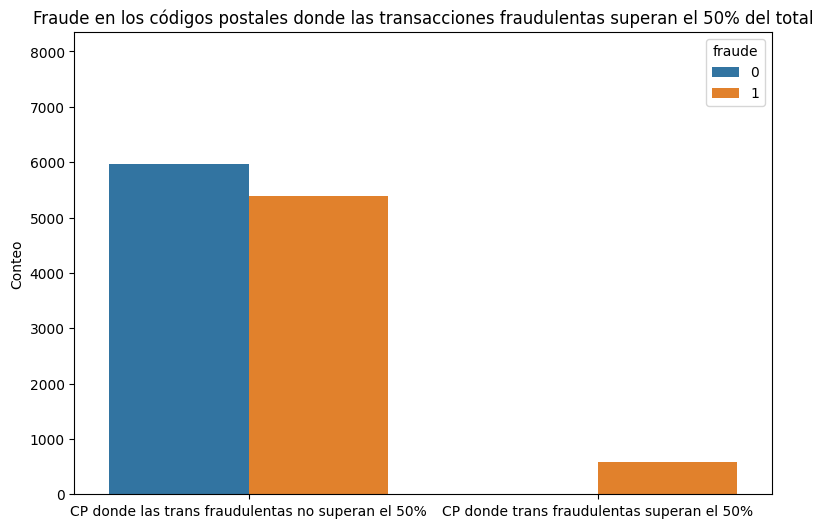

In [1040]:
plt.figure(figsize=(9, 6))

# Crear el gráfico countplot con Seaborn
sns.countplot(data=df_combined3, x='is_fraud_zip', hue='is_fraud')

# Ajustar los límites de los ejes
plt.xlim(-0.5, 1.5)  # Ajustar los límites del eje x para centrar las barras
plt.ylim(0, df_combined3.shape[0] * 0.7)  # Ajustar los límites del eje y según el máximo de conteos

# Añadir título y etiquetas
plt.title('Fraude en los códigos postales donde las transacciones fraudulentas superan el 50% del total')
plt.ylabel('Conteo')
plt.xlabel('')

plt.xticks(ticks=[0, 1], labels=['CP donde las trans fraudulentas no superan el 50%', 'CP donde trans fraudulentas superan el 50%'])

# Mostrar la leyenda
plt.legend(title='fraude', loc='upper right')

# Mostrar el gráfico
plt.show()

In [1041]:
fraud_counts[fraud_counts > 20].index

Index(['Scott_Martin', 'Jennifer_Scott', 'Robert_James'], dtype='object', name='complete_name')

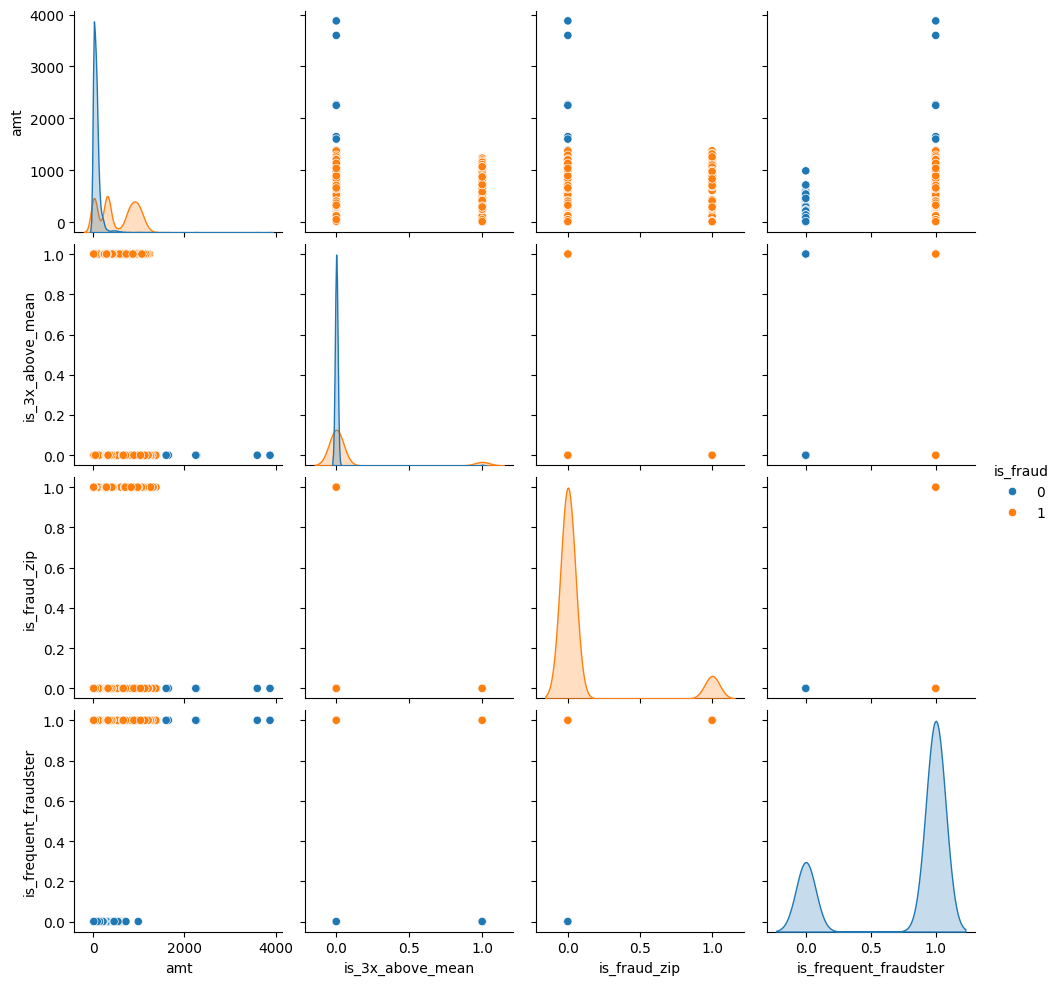

In [1042]:
sns.pairplot(df_combined3, hue= 'is_fraud')

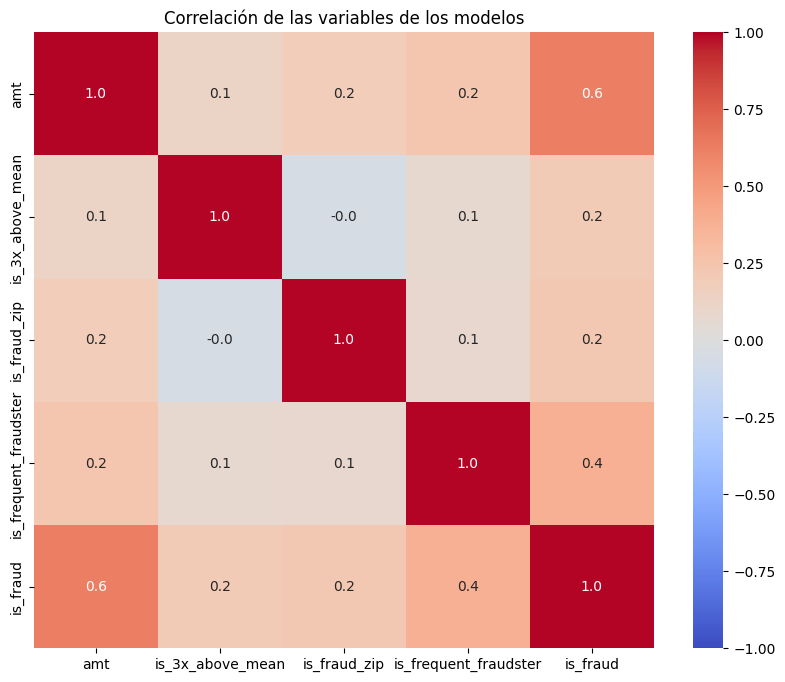

In [1043]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined3.corr(), annot=True, cmap='coolwarm', fmt='.1f', vmin=-1)
plt.title('Correlación de las variables de los modelos')
plt.show()

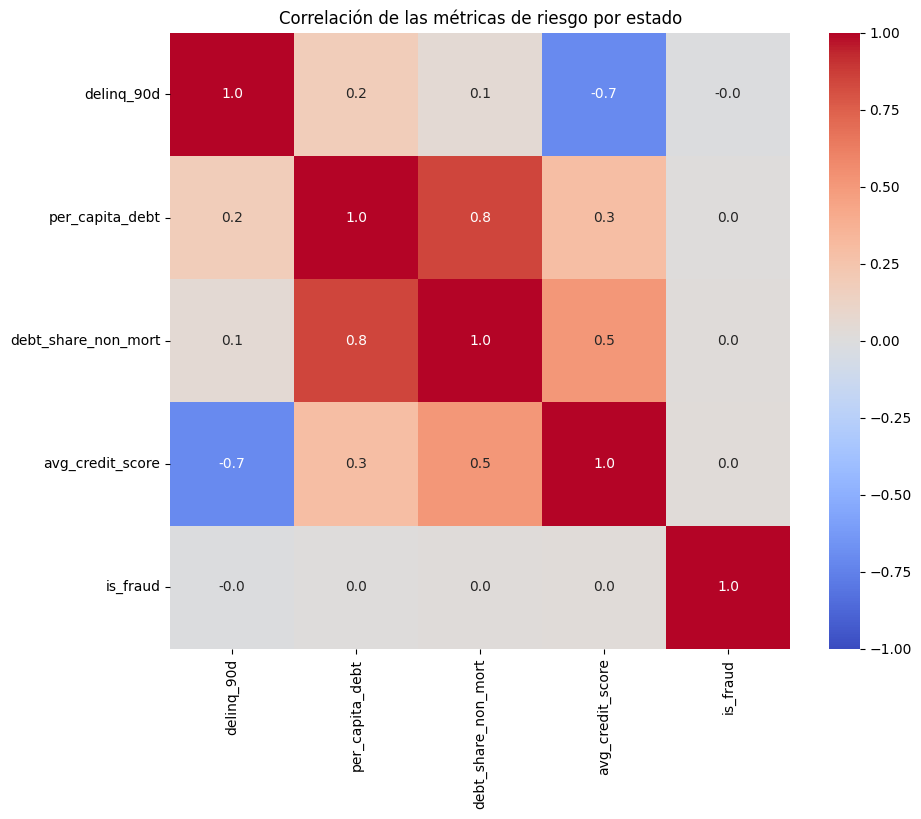

In [1044]:
new_column_names = {
    'credit_card_delinq_rate_90_days': 'delinq_90d',
    'Per_capita_creditcard_debt': 'per_capita_debt',
    'Credit_card_debt_as_share_non-mortgage debt': 'debt_share_non_mort',
    'Av_cred_score': 'avg_credit_score',
    'is_fraud': 'is_fraud'
}

# Renombrar las columnas en df_combined10
df_combined10.rename(columns=new_column_names, inplace=True)

# Crear el heatmap con las nuevas columnas
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined10.corr(), annot=True, cmap='coolwarm', fmt='.1f', vmin=-1)
plt.title('Correlación de las métricas de riesgo por estado')
plt.show()

## MODELOS

In [1045]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,  multilabel_confusion_matrix

### DECISION TREE (ejemplo para explicar a negocio)

In [1424]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth= 3, max_features=3,
                                  random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=42)

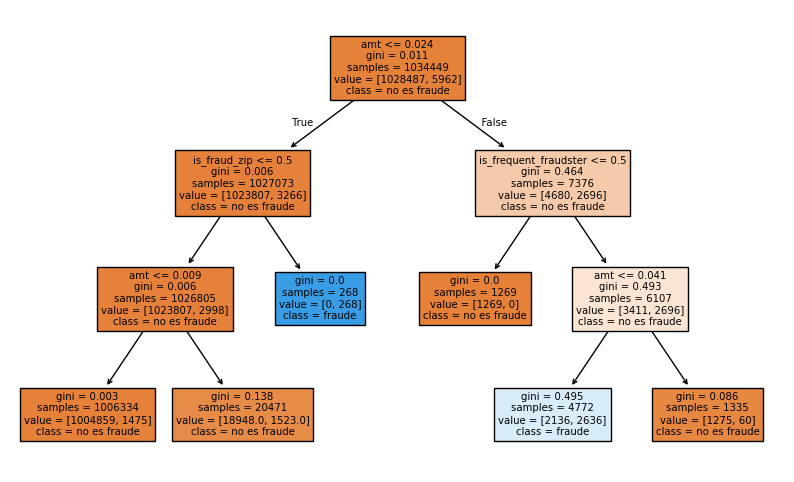

In [1426]:
feature_names = X_train.columns  # Assuming X_train is a DataFrame
class_names = ['no es fraude', 'fraude']  # Adjust based on your classes

plt.figure(figsize=(10, 6))
sklearn.tree.plot_tree(tree_clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True)
plt.show()

### RANDOM FOREST

In [1048]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV

estimator2 = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid_rf = {
    'max_depth': [3, 4, 5],
    'max_features': [3, 4, 5]         
    #'min_samples_split': [2, 5, 10],     
    #'min_samples_leaf': [1, 3, 5]        
}

scoring = 'recall'

grid_search = GridSearchCV(estimator=estimator2, param_grid=param_grid_rf, cv=10, scoring=scoring)

grid_search.fit(X_rus, y_rus)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntaje de validación cruzada (recall):")
print(grid_search.best_score_)

Mejores parámetros encontrados:
{'max_depth': 5, 'max_features': 3}
Mejor puntaje de validación cruzada (recall):
0.944648297415489


In [1119]:
rnd_clf = RandomForestClassifier(n_estimators=100,
                                 max_depth= 5, max_features=3)
rnd_clf.fit(X_ros, y_ros)

y_pred_rfh = rnd_clf.predict(X_test)

print("recall:", recall_score(y_test, y_pred_rfh))

recall: 0.9540380827314511


In [1434]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [1050]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rfh))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    257090
           1       0.04      0.95      0.07      1523

    accuracy                           0.85    258613
   macro avg       0.52      0.90      0.49    258613
weighted avg       0.99      0.85      0.91    258613



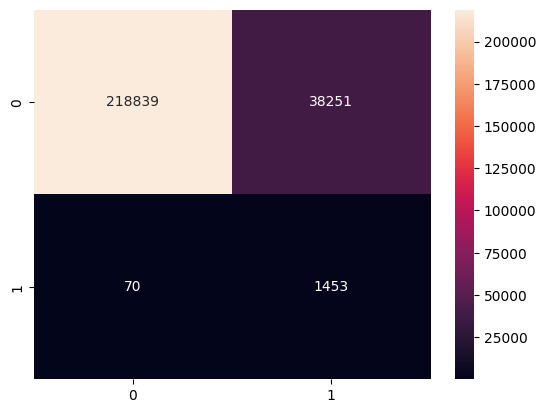

In [1432]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfh), annot=True, fmt= 'd');

C:\Users\rafam\AppData\Local\Temp\ipykernel_11172\2763300092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable_names, y=rnd_clf.feature_importances_, palette='Blues_d')


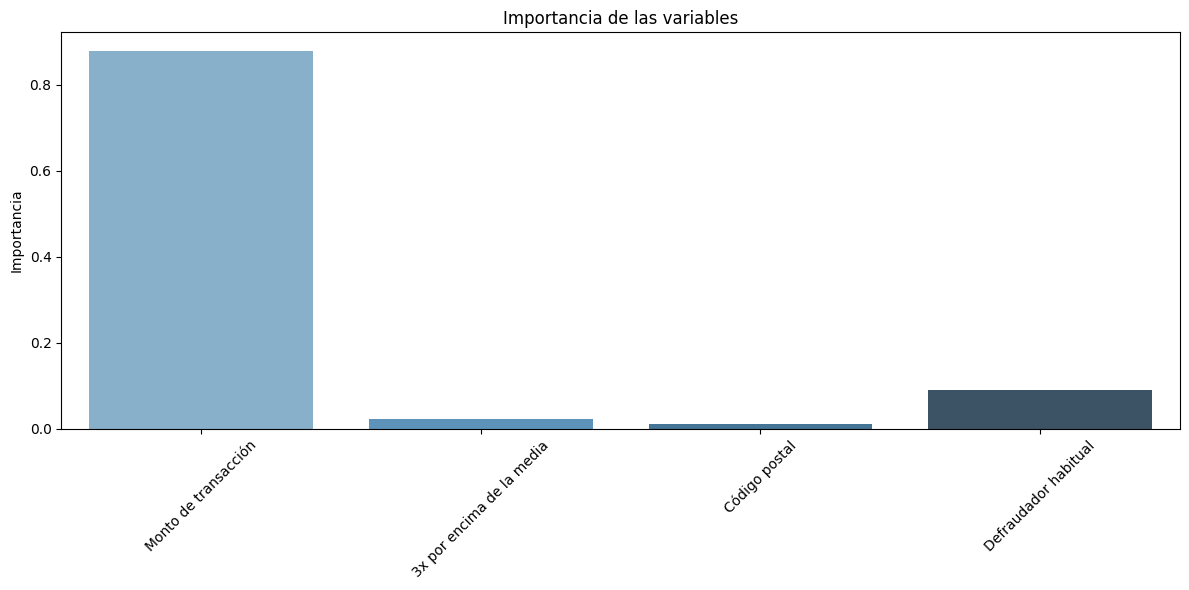

In [1447]:
variable_names = ['Monto de transacción', '3x por encima de la media', 'Código postal', 'Defraudador habitual']

# Crear el gráfico de barras con los nombres de las variables y una escala de colores azules
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.barplot(x=variable_names, y=rnd_clf.feature_importances_, palette='Blues_d')
plt.ylabel('Importancia')
plt.title('Importancia de las variables')
plt.xticks(rotation=45)  # Rotar los nombres de las características si es necesario
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [1053]:
best_model = grid_search.best_estimator_
best_model.fit(X_test, y_test) 

RandomForestClassifier(max_depth=5, max_features=3, random_state=42)

In [1257]:
import pickle  
with open('best_model.pkl', 'wb') as file:
   pickle.dump(best_model, file)

In [1258]:
with open('best_model.pkl', 'rb') as file:
        loaded_model_bm= pickle.load(file)

In [1390]:
nuevo_registro = pd.DataFrame({
    'amt': [10],
    'is_3x_above_mean': [0],
    'is_fraud_zip': [0],
    'is_frequent_fraudster': [0],
    
})

In [1412]:
nuevo_registro_2 = pd.DataFrame({
    'amt': [1000],
    'is_3x_above_mean': [0],
    'is_fraud_zip': [1],
    'is_frequent_fraudster': [0]
})

In [1413]:
loaded_model_bm.predict(nuevo_registro)

array([0], dtype=int64)

In [1414]:
loaded_model_bm.predict(nuevo_registro_2)

array([1], dtype=int64)

### ADABOOST

In [1441]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

estimator3 = DecisionTreeClassifier(max_depth= 3, max_features=3, random_state=42)

estimator4 = AdaBoostClassifier(estimator = estimator3, random_state=42)

param_grid_ab = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.9]      
}

scoring = 'recall'

grid_searchab = GridSearchCV(estimator=estimator4, param_grid=param_grid_ab, cv=10, scoring=scoring)

grid_searchab.fit(X_rus, y_rus)

print("Mejores parámetros encontrados:")
print(grid_searchab.best_params_)
print("Mejor puntaje de validación cruzada (recall):")
print(grid_searchab.best_score_)

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Mejores parámetros encontrados:
{'learning_rate': 0.1}
Mejor puntaje de validación cruzada (recall):
0.9100960619653076


In [1442]:
from sklearn.ensemble import AdaBoostClassifier

estimator3 = DecisionTreeClassifier(max_depth=3, max_features=3)

ada_clf = AdaBoostClassifier(estimator = estimator3,
                             n_estimators=100,
                             learning_rate=0.1,
                             random_state=42)

ada_clf.fit(X_ros, y_ros)

y_pred_ada = ada_clf.predict(X_test)
recall_score(y_test, y_pred_ada)

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9152987524622456

In [1283]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257090
           1       0.06      0.92      0.11      1523

    accuracy                           0.91    258613
   macro avg       0.53      0.91      0.53    258613
weighted avg       0.99      0.91      0.95    258613



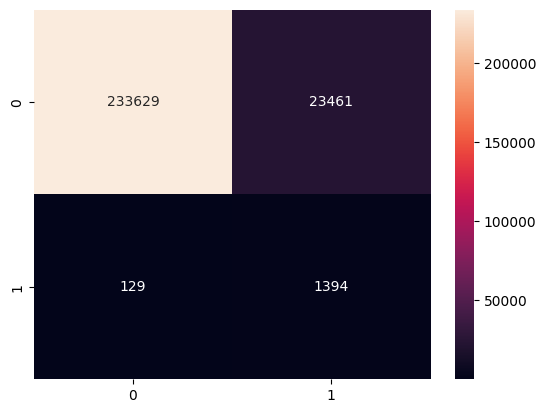

In [1436]:
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt= 'd');

C:\Users\rafam\AppData\Local\Temp\ipykernel_11172\1011016985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable_names, y=ada_clf.feature_importances_, palette='Blues_d')


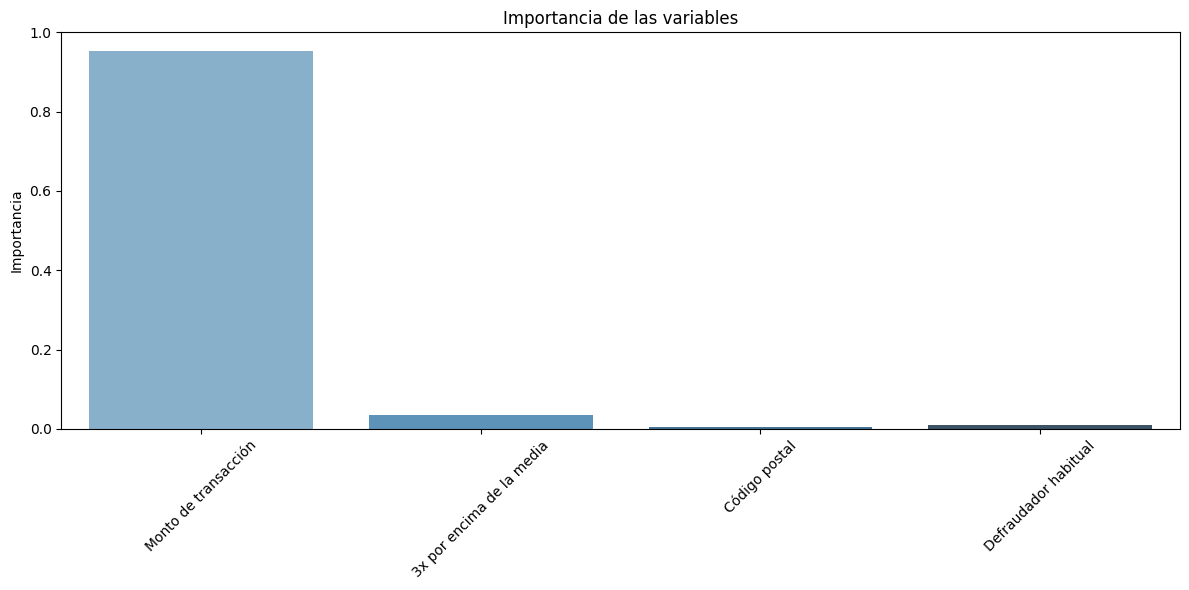

In [1446]:
variable_names = ['Monto de transacción', '3x por encima de la media', 'Código postal', 'Defraudador habitual']

# Crear el gráfico de barras con los nombres de las variables y una escala de colores azules
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.barplot(x=variable_names, y=ada_clf.feature_importances_, palette='Blues_d')
plt.ylabel('Importancia')
plt.title('Importancia de las variables')
plt.xticks(rotation=45)  # Rotar los nombres de las características si es necesario
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [1286]:
adaboost_model = grid_searchab.best_estimator_
adaboost_model.fit(X_test, y_test) 

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3, max_features=3,
                                                    random_state=42),
                   learning_rate=0.1, random_state=42)

In [1287]:
import pickle  
with open('adaboost_model.pkl', 'wb') as file:
   pickle.dump(adaboost_model, file)

In [1288]:
with open('adaboost_model.pkl', 'rb') as file:
        loaded_model_ab= pickle.load(file)

In [1415]:
loaded_model_ab.predict(nuevo_registro)

array([0], dtype=int64)

In [1416]:
loaded_model_ab.predict(nuevo_registro_2)

array([0], dtype=int64)

### GRADIENT BOOSTING

In [1127]:
from sklearn.ensemble import GradientBoostingClassifier

estimator6 = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'max_depth': [2, 3, 6, 10],
    'max_features': [2, 4, 7, 10], 
    'learning_rate': [0.1, 0.4, 0.7, 0.9]      
}

scoring = 'recall'

grid_searchgb = GridSearchCV(estimator=estimator6, param_grid=param_grid_gb, cv=5, scoring=scoring)

grid_searchgb.fit(X_rus, y_rus)

print("Mejores parámetros encontrados:")
print(grid_searchgb.best_params_)
print("Mejor puntaje de validación cruzada (recall):")
print(grid_searchgb.best_score_)

Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2}
Mejor puntaje de validación cruzada (recall):
0.9116040437226101


In [1134]:
gbct = GradientBoostingClassifier(max_depth=3,
                                  max_features=2,
                                  n_estimators=100,
                                  learning_rate=0.1,
                                  random_state=42)
gbct.fit(X_ros, y_ros)


y_pred_gbct = gbct.predict(X_test)
recall_score(y_test, y_pred_gbct)

0.9093893630991464

In [1291]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gbct))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257090
           1       0.05      0.91      0.10      1523

    accuracy                           0.91    258613
   macro avg       0.53      0.91      0.53    258613
weighted avg       0.99      0.91      0.95    258613



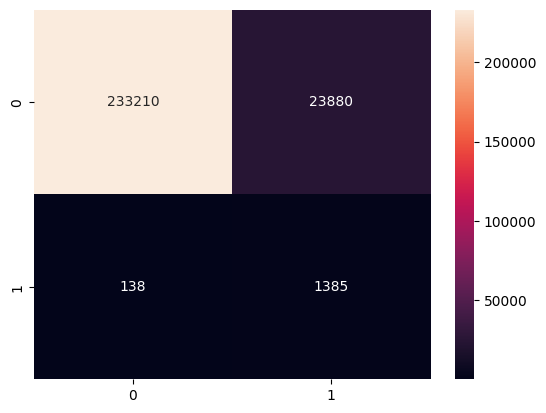

In [1448]:
sns.heatmap(confusion_matrix(y_test, y_pred_gbct), annot=True, fmt= 'd');

In [1293]:
gb_model = grid_searchgb.best_estimator_
gb_model.fit(X_test, y_test) 

GradientBoostingClassifier(max_features=2, random_state=42)

In [1294]:
import pickle  
with open('gb_model.pkl', 'wb') as file:
   pickle.dump(gb_model, file)

In [1417]:
with open('gb_model.pkl', 'rb') as file:
        loaded_model_gb= pickle.load(file)

In [1418]:
loaded_model_gb.predict(nuevo_registro)

array([0], dtype=int64)

In [1419]:
loaded_model_gb.predict(nuevo_registro_2)

array([1], dtype=int64)

### XGBOOST

In [1135]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=3,
                            max_features=2,
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)

# Fit the model to the training data
xgb_model.fit(X_ros, y_ros)

y_pred_xgb = xgb_model.predict(X_test)
recall_score(y_test, y_pred_xgb)


# accuracy_xgb = modelo.score(X_ros, y_ros)
# print(f'Test accuracy: {accuracy_xgb:.2f}')

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


0.9074195666447801

In [1298]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    257090
           1       0.05      0.91      0.10      1523

    accuracy                           0.91    258613
   macro avg       0.53      0.91      0.53    258613
weighted avg       0.99      0.91      0.95    258613



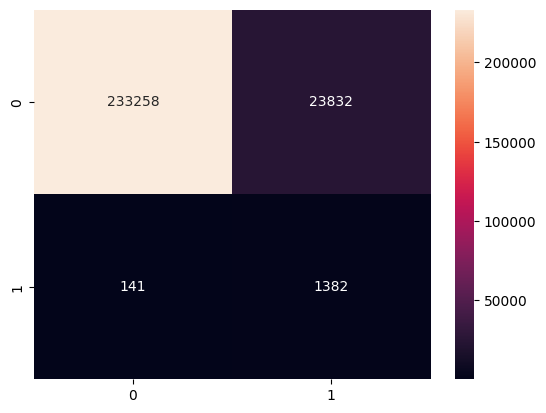

In [1449]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt= 'd');

In [1300]:
xgb_model.fit(X_test, y_test) 

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_features=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [1301]:
with open('xgb_model.pkl', 'wb') as file:
   pickle.dump(xgb_model, file)

In [1302]:
with open('xgb_model.pkl', 'rb') as file:
        loaded_model_xgb= pickle.load(file)

In [1420]:
loaded_model_xgb.predict(nuevo_registro)

array([0])

In [1421]:
loaded_model_xgb.predict(nuevo_registro_2)

array([0])

### BAGGING CLASSIFIER

In [1078]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# estimator = DecisionTreeClassifier(random_state=42)

# param_grid_dt = {
#     'max_depth': [3, 6, 7],         
#     'max_features': [4, 6, 7]      
# }

# scoring = 'recall'

# grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid_dt, cv=10, scoring=scoring)

# grid_search.fit(X_rus, y_rus)

# print("Mejores parámetros encontrados:")
# print(grid_search.best_params_)
# print("Mejor puntaje de validación cruzada (recall):")
# print(grid_search.best_score_)

In [1079]:
# modelo = DecisionTreeClassifier(max_depth= 3, max_features=7, random_state=42)

# bag_clf = BaggingClassifier(
#     estimator = modelo,
#     n_estimators=100, # Cantidad de árboles
#     # max_samples=100000, # Muestras utilizadas en boostrapping
#     # bootstrap=True, # Usamos boostrapping
#     # max_features = 3 # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
#     random_state=42)


# bag_clf.fit(X_ros, y_ros)

# y_pred_bag_clf = bag_clf.predict(X_test)
# recall_score(y_test, y_pred_bag_clf)

In [1080]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred_bag_clf))

In [1081]:
# sns.heatmap(confusion_matrix(y_test, y_pred_bag_clf), annot=True)

### SUPPORT VECTOR MACHINES

In [1082]:
# sns.scatterplot(data= df_combined, x='amt', y='is_three_times_above_mean', hue= 'is_fraud', palette='viridis')

In [1083]:
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# svm_clf3 = Pipeline([
#     ("SVC", SVC(C = 100, gamma=True,  probability=True))])
# svm_clf3

In [1084]:
# svm_clf3.fit(X_rus, y_rus)

In [1085]:
# y_pred_bag_clf = bag_clf.predict(X_test)
# recall_score(y_test, y_pred_bag_clf)

In [1086]:
# probabilities = svm_clf3.predict_proba(X_test)[:, 0]

# df = pd.DataFrame(X_test, columns=['column1', 'column2'])
# df['probability_class_0'] = probabilities

# plt.figure(figsize=(10, 6))
# scatter = sns.scatterplot(data=df_combined, x='amt', y='is_three_times_above_mean', hue='probability_class_0', palette='viridis')

# norm = plt.Normalize(probabilities.min(), probabilities.max())
# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])

# plt.title('Scatterplot with Probability of Predicting Class 0')
# plt.xlabel('column1')
# plt.ylabel('column2')
# plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Probability of Class 0')
# plt.show()

## Aprendizaje No Supervisado

### Reducción de dimensionalidad (PCA)

In [1087]:
from sklearn.decomposition import PCA

In [1088]:
pca = PCA()

# Ajustar PCA a los datos
pca.fit(X_scaled)

PCA()

In [1176]:
X_scaled

,amt,is_3x_above_mean,is_fraud_zip,is_frequent_fraudster
0,0.002544,0.0,0.0,1.0
1,0.001119,0.0,0.0,1.0
2,0.000378,0.0,0.0,0.0
3,0.001038,0.0,0.0,1.0
4,0.002424,0.0,0.0,1.0
...,...,...,...,...
1293057,0.000373,0.0,0.0,1.0
1293058,0.001252,0.0,0.0,1.0
1293059,0.000602,0.0,0.0,1.0
1293060,0.000419,0.0,0.0,1.0


In [1177]:
components = pca.components_

# Obtener la varianza explicada
explained_variance = pca.explained_variance_ratio_

In [1178]:
# Mostrar la varianza explicada por cada componente principal
for i, var_ratio in enumerate(explained_variance):
    print(f'Varianza explicada por el componente principal {i+1}: {var_ratio:.4f}')

Varianza explicada por el componente principal 1: 0.9797
Varianza explicada por el componente principal 2: 0.0172
Varianza explicada por el componente principal 3: 0.0030
Varianza explicada por el componente principal 4: 0.0002


In [1179]:
nombres_columnas = ['amt', 'is_3x_above_mean', 'is_fraud_zip', 'is_frequent_fraudster']  # Ejemplo

# Mostrar las variables con mayor contribución a los componentes principales
for i, comp in enumerate(components):
    # Ordenar las variables por su contribución al componente principal i
    indices_ordenados = comp.argsort()[::-1]
    variables_ordenadas = [nombres_columnas[indice] for indice in indices_ordenados]
    print(f'Componente principal {i+1}: Variables con mayor contribución - {variables_ordenadas}')

Componente principal 1: Variables con mayor contribución - ['is_frequent_fraudster', 'is_fraud_zip', 'amt', 'is_3x_above_mean']
Componente principal 2: Variables con mayor contribución - ['is_3x_above_mean', 'amt', 'is_frequent_fraudster', 'is_fraud_zip']
Componente principal 3: Variables con mayor contribución - ['is_fraud_zip', 'amt', 'is_3x_above_mean', 'is_frequent_fraudster']
Componente principal 4: Variables con mayor contribución - ['amt', 'is_frequent_fraudster', 'is_3x_above_mean', 'is_fraud_zip']


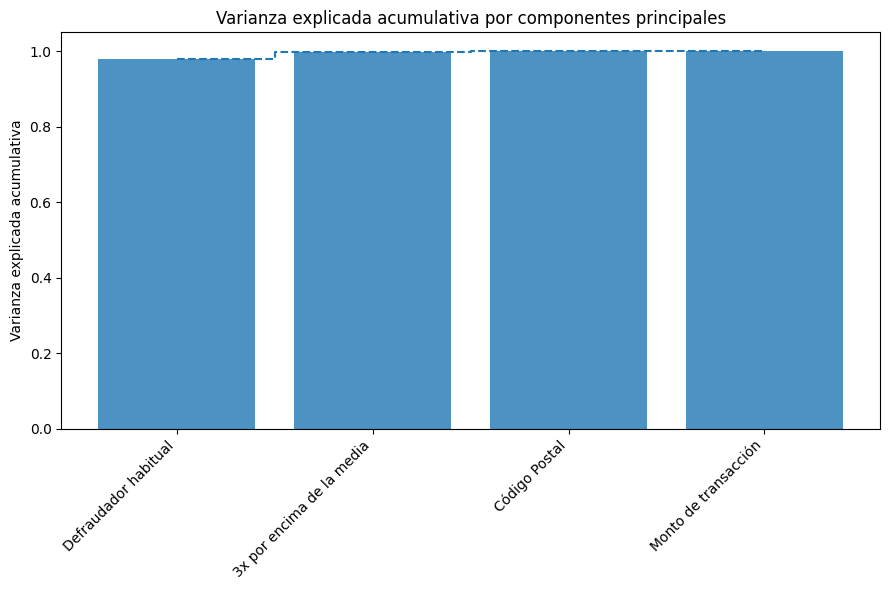

In [1456]:
explained_variance_cumulative = np.cumsum(explained_variance)

component_names = [
    'Defraudador habitual',
    '3x por encima de la media',
    'Código Postal', 
    'Monto de transacción']

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(9, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance_cumulative, alpha=0.8, align='center',
        label='Varianza explicada acumulativa')
plt.step(range(1, len(explained_variance) + 1), explained_variance_cumulative, where='mid', linestyle='--')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Varianza explicada acumulativa por componentes principales')

# Establecer nombres de las variables en el eje x
plt.xticks(range(1, len(explained_variance) + 1), component_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [1560]:
X20= merged_df1[['amt', 'is_3x_above_mean', 'Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days']]
X20

,amt,is_3x_above_mean,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days
0,74.63,0,2730,0.0672
1,33.40,0,3450,0.1066
2,11.95,0,2450,0.0665
3,31.06,0,2430,0.0708
4,71.16,0,3560,0.0660
...,...,...,...,...
1293057,11.80,0,3700,0.0738
1293058,37.24,0,2700,0.0682
1293059,18.42,0,2510,0.0534
1293060,13.13,0,2150,0.0877


In [1561]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_scaled20 = scaler.fit_transform(X20)

X_scaled20= pd.DataFrame(X_scaled20)

nuevos_nombres = {
    0: 'amt',
    1: 'is_3x_above_mean',
    2: 'Per_capita_creditcard_debt',
    3: 'credit_card_delinq_rate_90_days',
}

X_scaled20 = X_scaled20.rename(columns=nuevos_nombres)

X_scaled20

,amt,is_3x_above_mean,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days
0,0.002544,0.0,0.302083,0.207207
1,0.001119,0.0,0.677083,0.798799
2,0.000378,0.0,0.156250,0.196697
3,0.001038,0.0,0.145833,0.261261
4,0.002424,0.0,0.734375,0.189189
...,...,...,...,...
1293057,0.000373,0.0,0.807292,0.306306
1293058,0.001252,0.0,0.286458,0.222222
1293059,0.000602,0.0,0.187500,0.000000
1293060,0.000419,0.0,0.000000,0.515015


In [1562]:
pca20 = PCA()

# Ajustar PCA a los datos
pca20.fit(X_scaled20)

PCA()

In [1563]:
components20 = pca20.components_

# Obtener la varianza explicada
explained_variance20 = pca20.explained_variance_ratio_

In [1564]:
# Mostrar la varianza explicada por cada componente principal
for i, var_ratio in enumerate(explained_variance20):
    print(f'Varianza explicada por el componente principal {i+1}: {var_ratio:.4f}')

Varianza explicada por el componente principal 1: 0.5852
Varianza explicada por el componente principal 2: 0.3782
Varianza explicada por el componente principal 3: 0.0362
Varianza explicada por el componente principal 4: 0.0003


In [1565]:
nombres_columnas20 = ['amt', 'is_3x_above_mean', 'Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days', 'is_fraud_zip']  # Ejemplo

# Mostrar las variables con mayor contribución a los componentes principales
for i, comp in enumerate(components20):
    # Ordenar las variables por su contribución al componente principal i
    indices_ordenados20 = comp.argsort()[::-1]
    variables_ordenadas20 = [nombres_columnas20[indice] for indice in indices_ordenados20]
    print(f'Componente principal {i+1}: Variables con mayor contribución - {variables_ordenadas20}')

Componente principal 1: Variables con mayor contribución - ['Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days', 'amt', 'is_3x_above_mean']
Componente principal 2: Variables con mayor contribución - ['credit_card_delinq_rate_90_days', 'is_3x_above_mean', 'amt', 'Per_capita_creditcard_debt']
Componente principal 3: Variables con mayor contribución - ['is_3x_above_mean', 'amt', 'Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days']
Componente principal 4: Variables con mayor contribución - ['amt', 'credit_card_delinq_rate_90_days', 'Per_capita_creditcard_debt', 'is_3x_above_mean']


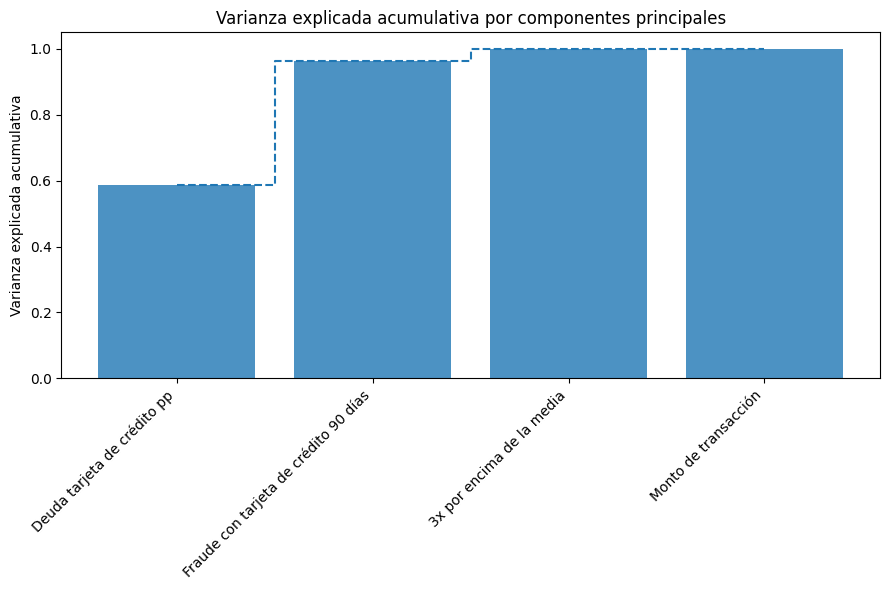

In [1566]:
explained_variance_cumulative20 = np.cumsum(explained_variance20)

component_names = [
    'Deuda tarjeta de crédito pp',
    'Fraude con tarjeta de crédito 90 días',
    '3x por encima de la media',
    'Monto de transacción'
]

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(9, 6))
plt.bar(range(1, len(explained_variance20) + 1), explained_variance_cumulative20, alpha=0.8, align='center',
        label='Varianza explicada acumulativa')
plt.step(range(1, len(explained_variance20) + 1), explained_variance_cumulative20, where='mid', linestyle='--')
plt.ylabel('Varianza explicada acumulativa')
plt.title('Varianza explicada acumulativa por componentes principales')

# Establecer nombres de las variables en el eje x
plt.xticks(range(1, len(explained_variance20) + 1), component_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Modelos No Supervisados: KMEANS

In [1543]:
from sklearn.cluster import KMeans

In [1544]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

In [1545]:
y_pred2= kmeans.fit_predict(X_scaled)

In [1546]:
print(classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86   1285577
           1       0.00      0.00      0.00      7485

    accuracy                           0.75   1293062
   macro avg       0.50      0.38      0.43   1293062
weighted avg       0.99      0.75      0.85   1293062



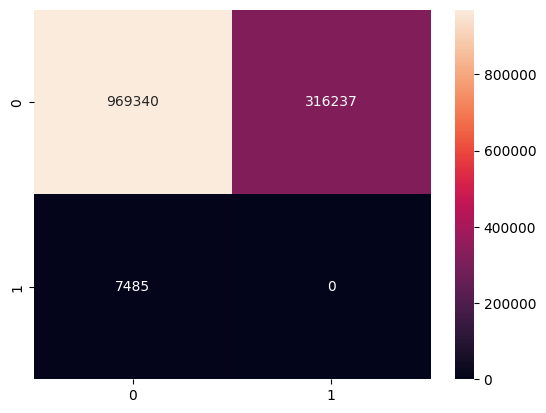

In [1521]:
sns.heatmap(confusion_matrix(y, y_pred2), annot=True, fmt='d');

In [1523]:
df['is_frequent_fraudster'].value_counts()

is_frequent_fraudster
1    978904
0    317771
Name: count, dtype: int64

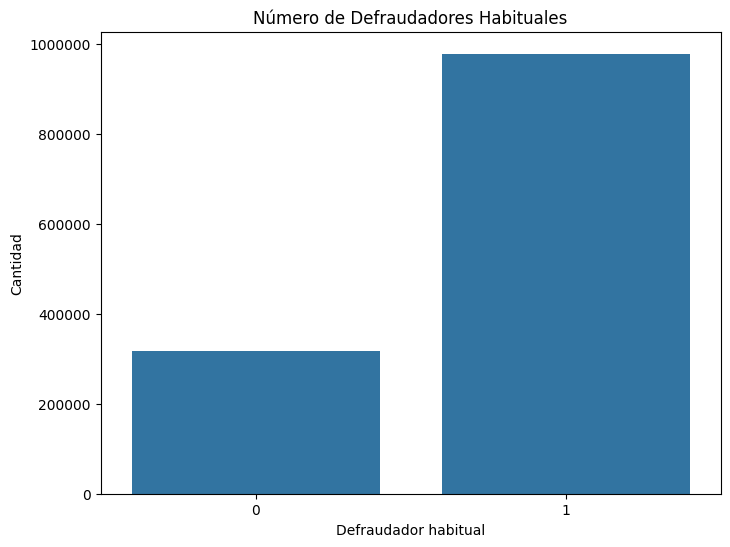

In [1534]:
import matplotlib.ticker as ticker


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_frequent_fraudster')

# Añadir título y etiquetas
plt.title('Número de Defraudadores Habituales')
plt.xlabel('Defraudador habitual')
plt.ylabel('Cantidad')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))


# Mostrar el gráfico
plt.show()

In [1099]:
# kmeans_model= kmeans.fit(X_scaled)

El modelo k-Means tiene un recall bajísimo con las variables de mis modelos anteriores, probaré con otras vairiables. 

In [1553]:
X20= merged_df1[['amt', 'Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days', 'is_fraud_zip']]
X20

,amt,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days,is_fraud_zip
0,74.63,2730,0.0672,0
1,33.40,3450,0.1066,0
2,11.95,2450,0.0665,0
3,31.06,2430,0.0708,0
4,71.16,3560,0.0660,0
...,...,...,...,...
1293057,11.80,3700,0.0738,0
1293058,37.24,2700,0.0682,0
1293059,18.42,2510,0.0534,0
1293060,13.13,2150,0.0877,0


In [1554]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_scaled20 = scaler.fit_transform(X20)

X_scaled20= pd.DataFrame(X_scaled20)

nuevos_nombres = {
    0: 'amt',
    1: 'is_3x_above_mean',
    2: 'Per_capita_creditcard_debt',
    3: 'credit_card_delinq_rate_90_days',
}

X_scaled20 = X_scaled20.rename(columns=nuevos_nombres)

X_scaled20

,amt,is_3x_above_mean,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days
0,0.002544,0.302083,0.207207,0.0
1,0.001119,0.677083,0.798799,0.0
2,0.000378,0.156250,0.196697,0.0
3,0.001038,0.145833,0.261261,0.0
4,0.002424,0.734375,0.189189,0.0
...,...,...,...,...
1293057,0.000373,0.807292,0.306306,0.0
1293058,0.001252,0.286458,0.222222,0.0
1293059,0.000602,0.187500,0.000000,0.0
1293060,0.000419,0.000000,0.515015,0.0


In [1555]:
k = 2
kmeans3 = KMeans(n_clusters=k, n_init=10, random_state=42)

In [1556]:
y_pred3= kmeans3.fit_predict(X_scaled20)

In [1567]:
print(classification_report(y, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.34      0.51   1285577
           1       0.01      0.65      0.01      7485

    accuracy                           0.34   1293062
   macro avg       0.50      0.50      0.26   1293062
weighted avg       0.99      0.34      0.50   1293062



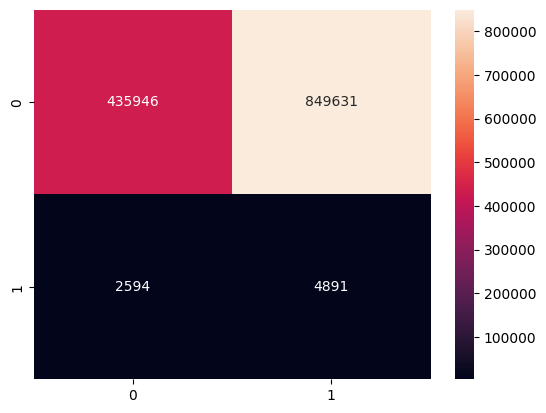

In [1568]:
sns.heatmap(confusion_matrix(y, y_pred3), annot=True, fmt= 'd')

In [1309]:
kmeans_model3= kmeans3.fit(X_scaled20)

Este modelo captura el 2/3 de las transacciones fraudulentas

In [1310]:
with open('kmeans_model3.pkl', 'wb') as file:
   pickle.dump(kmeans_model3, file)

In [1311]:
with open('kmeans_model3.pkl', 'rb') as file:
        loaded_model_kmeans3= pickle.load(file)

In [1314]:
merged_df1[['Per_capita_creditcard_debt',	'credit_card_delinq_rate_90_days'	]]

,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days
0,2730,0.0672
1,3450,0.1066
2,2450,0.0665
3,2430,0.0708
4,3560,0.0660
...,...,...
1293057,3700,0.0738
1293058,2700,0.0682
1293059,2510,0.0534
1293060,2150,0.0877


In [1331]:
nuevo_registro = pd.DataFrame({
    'amt': [10],
    'is_3x_above_mean': [0],
    'Per_capita_creditcard_debt': [2560],
    'credit_card_delinq_rate_90_days': [0.0660],
    'is_fraud_zip': [0]
})


In [1383]:
nuevo_registro_2 = pd.DataFrame({
    'amt': [1000],
    'is_3x_above_mean': [0],
    'Per_capita_creditcard_debt': [4000],
    'credit_card_delinq_rate_90_days': [0.0960],
    'is_fraud_zip': [0]
})


In [1384]:
loaded_model_kmeans3.predict(nuevo_registro)

array([0])

In [1385]:
loaded_model_kmeans3.predict(nuevo_registro_2)

array([0])

In [1101]:
# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_ros)
#                 for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

In [1102]:
# df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
# df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
# df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
# df_kmeans

In [1103]:
# list(range(10))

In [1104]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 10), inertias, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.axis([1, 9, 0, max(inertias) + 100])
# plt.show()

In [1105]:
# silhouette_scores = [silhouette_score(X, model.labels_)
#                      for model in kmeans_per_k[1:]]

In [1106]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()

In [1107]:
# from sklearn.metrics import silhouette_samples
# from matplotlib.ticker import FixedLocator, FixedFormatter

# plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)
    
#     y_pred = kmeans_per_k[k - 1].labels_
#     silhouette_coefficients = silhouette_samples(X, y_pred)

#     padding = len(X) // 30
#     pos = padding
#     ticks = []
#     for i in range(k):
#         coeffs = silhouette_coefficients[y_pred == i]
#         coeffs.sort()

#         color = mpl.cm.Spectral(i / k)
#         plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
#                           facecolor=color, edgecolor=color, alpha=0.7)
#         ticks.append(pos + len(coeffs) // 2)
#         pos += len(coeffs) + padding

#     plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
#     plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
#     if k in (3, 5):
#         plt.ylabel("Cluster")
    
#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

#     plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
#     plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
# plt.show()

In [1108]:
# MiniBatches

In [1109]:
# from sklearn.cluster import MiniBatchKMeans

In [1110]:
# minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)
# minibatch_kmeans.fit(X_ros)

In [1111]:
# y_pred = minibatch_kmeans.fit_predict(X_test)

In [1112]:
# mb_kmeans_per_k = [MiniBatchKMeans(n_clusters=k, n_init=20, random_state=42).fit(X_ros)
#                 for k in range(1, 20)]
# mb_inertias = [model.inertia_ for model in mb_kmeans_per_k]

In [1113]:
# mb_df_kmeans = pd.DataFrame(mb_inertias, columns=['inertia'])
# mb_df_kmeans['inertia_1'] = mb_df_kmeans['inertia'].shift(1)
# mb_df_kmeans['diff%'] = mb_df_kmeans['inertia']/mb_df_kmeans['inertia_1']
# mb_df_kmeans

In [1114]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 20), mb_inertias, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.axis([1, 20, 0, max(mb_inertias) + 100])
# plt.show()

In [1115]:
# from sklearn.metrics import silhouette_score
# silhouette_score(X_test, minibatch_kmeans.labels_)

In [1468]:
def plot_clusters(X_scaled20, y=None):
    plt.scatter(X_scaled20['Per_capita_creditcard_debt'], X_scaled20['credit_card_delinq_rate_90_days'], c='red', s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

C:\Users\rafam\AppData\Local\Temp\ipykernel_11172\2206929494.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


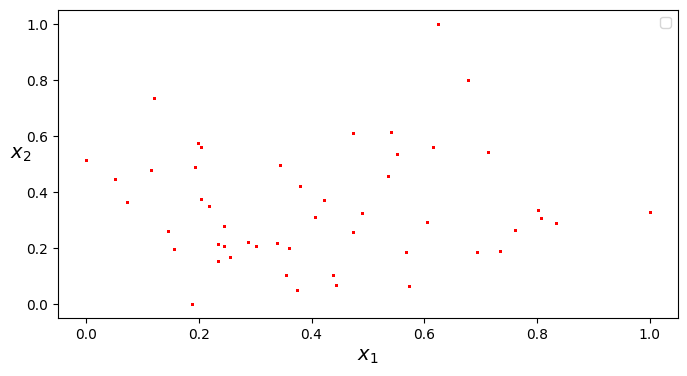

In [1469]:
plt.figure(figsize=(8, 4))
plot_clusters(X_scaled20)
plt.legend()
plt.show()

In [1386]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

c:\Users\rafam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


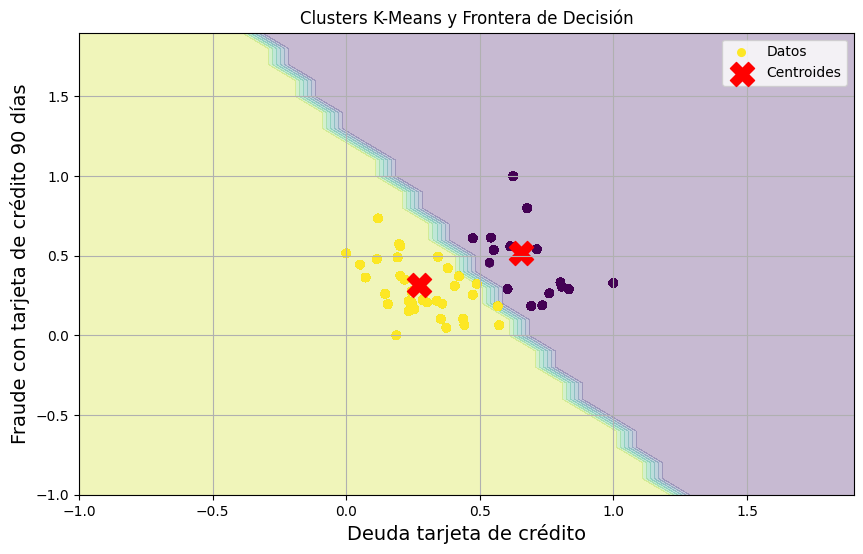

In [1475]:
X_scaled_selected = X_scaled20[['Per_capita_creditcard_debt', 'credit_card_delinq_rate_90_days']]

# Ajustar el modelo K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled_selected)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_scaled_selected['Per_capita_creditcard_debt'].min() - 1, X_scaled_selected['Per_capita_creditcard_debt'].max() + 1
y_min, y_max = X_scaled_selected['credit_card_delinq_rate_90_days'].min() - 1, X_scaled_selected['credit_card_delinq_rate_90_days'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predecir los clusters para cada punto de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Función para graficar los clusters y la frontera de decisión
def plot_clusters(X, y=None):
    plt.figure(figsize=(10, 6))
    
    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Graficar los puntos de datos
    plt.scatter(X['Per_capita_creditcard_debt'], X['credit_card_delinq_rate_90_days'], c=labels, s=30, cmap='viridis', label='Datos')

    # Graficar los centroides de los clusters
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

    # Añadir etiquetas y título al gráfico
    plt.xlabel("Deuda tarjeta de crédito", fontsize=14)
    plt.ylabel("Fraude con tarjeta de crédito 90 días", fontsize=14, rotation=90)
    plt.title('Clusters K-Means y Frontera de Decisión')
    plt.legend()
    plt.grid(True)
    plt.show()

# Usar la función para graficar los clusters y la frontera de decisión
plot_clusters(X_scaled_selected)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# neighbors = list(range(1, 21))

# recall_scores = []

# for k in neighbors:
#     # Crear el clasificador KNN
#     knn = KNeighborsClassifier(n_neighbors=k)
    
#     # Entrenar el modelo
#     knn.fit(X_rus, y_rus)
    
#     # Predecir en el conjunto de prueba
#     y_pred = knn.predict(X_test)
    
#     # Calcular la precisión y almacenarla
#     recall = recall_score(y_test, y_pred)
#     recall_scores.append(recall)

# # Graficar la precisión en función del número de vecinos
# plt.figure(figsize=(10, 6))
# plt.plot(neighbors, recall_scores, marker='o', linestyle='-', color='b', markersize=8)
# plt.title('Precisión del modelo KNN en función de número de vecinos')
# plt.xlabel('Número de vecinos')
# plt.ylabel('Precisión')
# plt.xticks(neighbors)
# plt.grid(True)
# plt.show()

### Modelos No Supervisados: Gaussian Mixture Model

In [1592]:
from sklearn.mixture import GaussianMixture

In [1613]:
gm2 = GaussianMixture(n_components=2, n_init=10, random_state=42)
y_predgm2= gm2.fit_predict(X_scaled)

In [1614]:
from sklearn.metrics import classification_report

print(classification_report(y, y_predgm2))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86   1285577
           1       0.00      0.00      0.00      7485

    accuracy                           0.75   1293062
   macro avg       0.50      0.38      0.43   1293062
weighted avg       0.99      0.75      0.85   1293062



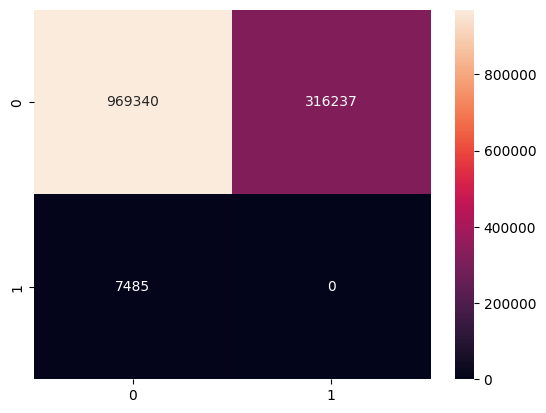

In [1615]:
sns.heatmap(confusion_matrix(y, y_predgm2), annot=True, fmt= 'd');

#### Detección de anomalías con GMM

In [1596]:
gm2 = GaussianMixture(n_components=2, n_init=10, random_state=42)
gm2.fit_predict(X_scaled)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [1597]:
densities2 = gm2.score_samples(X_scaled)
density_threshold2 = np.percentile(densities2, 5)
anomalies2 = X_scaled[densities2 < density_threshold2]

In [1598]:
anomalies_y1_2 = anomalies2[y[densities2 < density_threshold2] == 1]
anomalies_y1_2

,amt,is_3x_above_mean,is_fraud_zip,is_frequent_fraudster
87,0.016348,0.0,0.0,1.0
448,0.018780,0.0,0.0,1.0
965,0.017198,0.0,0.0,1.0
3288,0.000634,1.0,0.0,1.0
5749,0.019347,0.0,0.0,1.0
...,...,...,...,...
1285125,0.025548,0.0,0.0,1.0
1285173,0.029985,0.0,0.0,1.0
1287202,0.000607,1.0,0.0,1.0
1288563,0.000598,1.0,0.0,1.0


In [1599]:
len(anomalies_y1_2) / len(df[df['is_fraud'] == 1])

0.7976285638156142

In [1606]:
len(anomalies2)/ len(df)

0.04986137621223514

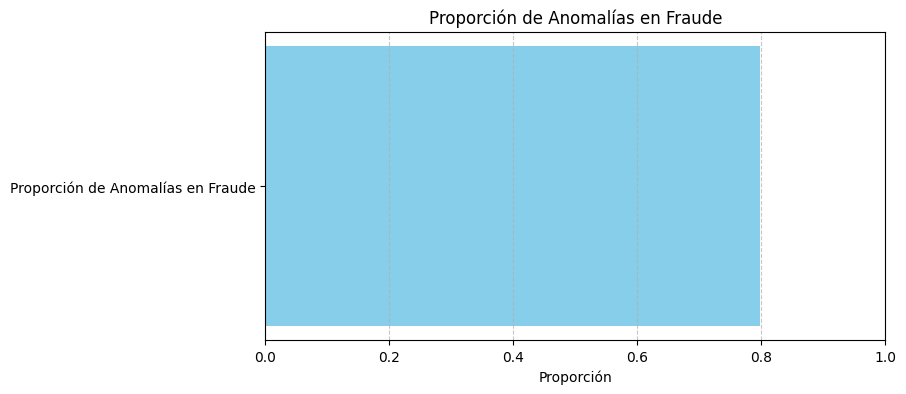

In [1600]:
proportion = len(anomalies_y1_2) / len(df[df['is_fraud'] == 1])

# Crear el gráfico de barra horizontal
plt.figure(figsize=(8, 4))
plt.barh(['Proporción de Anomalías en Fraude'], proportion, color='skyblue')
plt.xlim(0, 1)  # Ajustar el límite del eje x de 0 a 1 para reflejar la proporción
plt.xlabel('Proporción')
plt.title('Proporción de Anomalías en Fraude')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

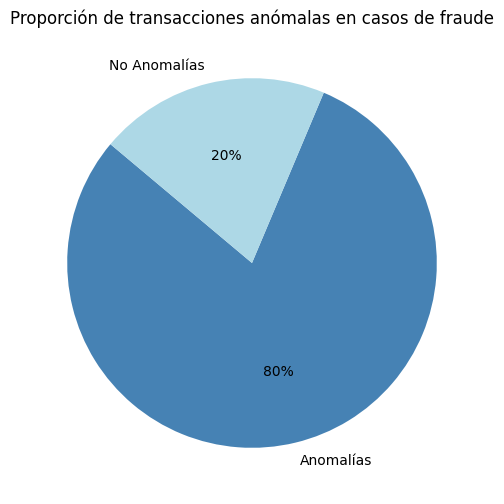

In [1601]:
proportion = len(anomalies_y1_2) / len(df[df['is_fraud'] == 1])
non_anomalies_proportion = 1 - proportion

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie([proportion, non_anomalies_proportion], labels=['Anomalías', 'No Anomalías'], autopct='%1.0f%%', colors=['steelblue', 'lightblue'], startangle=140)
plt.title('Proporción de transacciones anómalas en casos de fraude')

# Mostrar el gráfico
plt.show()

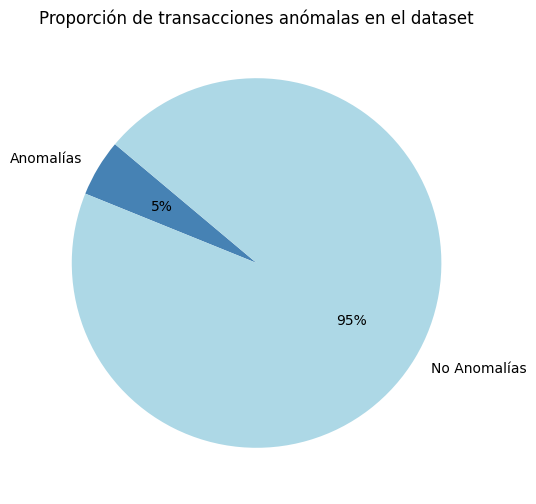

In [1633]:
anomalies_proportion = len(anomalies2) / len(df)
non_anomalies_proportion = 1 - anomalies_proportion

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie([anomalies_proportion, non_anomalies_proportion], labels=['Anomalías', 'No Anomalías'], autopct='%1.0f%%', colors=['steelblue', 'lightblue'], startangle=140)
plt.title('Proporción de transacciones anómalas en el dataset')

# Mostrar el gráfico
plt.show()

Este enfoque proporciona una manera de identificar y filtrar anomalías basadas en densidades, y verificar si coinciden con la clase y=1 (fraude). En este caso, aproximadamente el 80% de las observaciones en las que se produce fraude se encapsulan dentro del 5% de las observaciones más anómalas en cuanto a la distribucón de mis 6 variables explicativas. 

Es decir, identificar si una nueva transacción se encuentra entre el 5% de observaciones más anómalas respecto a la distribución de mis variables explicativas evitaría el fraude en un 80% de los casos.

In [1627]:
gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
y_predgm= gm.fit_predict(X_scaled20)

In [1628]:
densities = gm.score_samples(X_scaled20)
density_threshold = np.percentile(densities, 5)
anomalies = X_scaled20[densities < density_threshold]

In [1629]:
anomalies_y1 = anomalies[y[densities < density_threshold] == 1]
anomalies_y1

,amt,is_3x_above_mean,Per_capita_creditcard_debt,credit_card_delinq_rate_90_days
87,0.016348,0.0,0.218750,0.349850
448,0.018780,0.0,0.614583,0.560060
965,0.017198,0.0,0.713542,0.540541
3288,0.000634,1.0,0.338542,0.217718
5749,0.019347,0.0,0.234375,0.153153
...,...,...,...,...
1285125,0.025548,0.0,0.203125,0.560060
1285173,0.029985,0.0,1.000000,0.328829
1287202,0.000607,1.0,0.677083,0.798799
1288563,0.000598,1.0,0.234375,0.213213


In [1630]:
len(anomalies_y1) / len(df[df['is_fraud'] == 1])

0.7799094058086864

In [1631]:
print(classification_report(y, y_predgm))

              precision    recall  f1-score   support

           0       0.85      0.02      0.04   1285577
           1       0.00      0.45      0.01      7485

    accuracy                           0.02   1293062
   macro avg       0.43      0.24      0.02   1293062
weighted avg       0.84      0.02      0.03   1293062



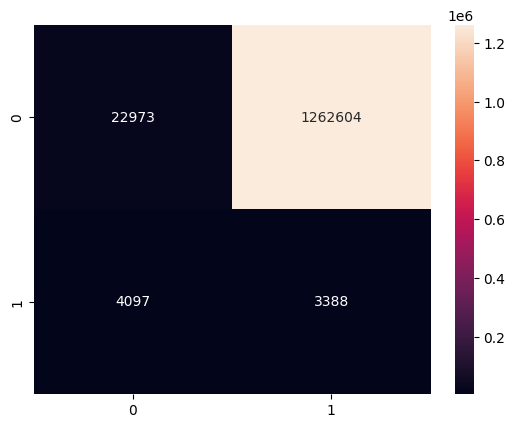

In [1632]:
sns.heatmap(confusion_matrix(y, y_predgm), annot=True, fmt= 'd');